# Thermal Motion - Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data files
df_01 = pd.read_csv("./data/data_16.txt", sep='\t', header=1, skiprows=0)
df_02 = pd.read_csv("./data/data_16.2.txt", sep='\t', header=1, skiprows=0)
df_03 = pd.read_csv("./data/data_16.3.txt", sep='\t', header=1, skiprows=0)
df_04 = pd.read_csv("./data/data_16.4.txt", sep='\t', header=1, skiprows=0)
df_05 = pd.read_csv("./data/data_17.txt", sep='\t', header=1, skiprows=0)
df_06 = pd.read_csv("./data/data_17.1.txt", sep='\t', header=1, skiprows=0)
df_07 = pd.read_csv("./data/data_18.txt", sep='\t', header=1, skiprows=0)
df_08 = pd.read_csv("./data/data_18.1.txt", sep='\t', header=1, skiprows=0)
df_09 = pd.read_csv("./data/data_18.2.txt", sep='\t', header=1, skiprows=0)
df_10 = pd.read_csv("./data/data_18.3.txt", sep='\t', header=1, skiprows=0)
df_11 = pd.read_csv("./data/data_19.txt", sep='\t', header=1, skiprows=0)
df_12 = pd.read_csv("./data/data_19.1.txt", sep='\t', header=1, skiprows=0)
df_13 = pd.read_csv("./data/data_19.2.txt", sep='\t', header=1, skiprows=0)
df_14 = pd.read_csv("./data/data_19.3.txt", sep='\t', header=1, skiprows=0)

df = [df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14]

## Mean Squared Distance vs. Time
Plotting the squared distance versus time (equation 12) should give a straight line with slope
2D for one-dimensional motion. The diffusion coeﬀicient $D$ can then be used to calculate
the Boltzmann constant $k$ by $D= kT /γ$. For each particle you tracked, use the squared
distance traveled to directly fit $D$ and calculate $k$.

1. Calculate the distance traveled as a function of time.
2. Plot the distance traveled as a function of time.
3. Fit a straight line to the dataset and use the fit coeﬀicients to calculate D and k.
4. Calculate the difference from the accepted value of k = 1.38 × 10−23J/K.

In [3]:
# squared distance traveled as a function of time

# 120 frames, 2 frames per second
# - time steps are 0.5s, add a time column
time = np.fromiter((0 + n*0.5 for n in range(120)), dtype=float)

for d in df:
    # time
    d.insert(loc=0, column='time', value=time)

    # distance from point to point
    dx = [];
    dy = [];
    i = 0;
    for r in d.iloc[1:].itertuples():
        # x
        dx.append((r[2]-d.iloc[i])[1])
        # y
        dy.append((r[3]-d.iloc[i])[2])
        i += 1;
    dx.append(0);
    dy.append(0);
    d.insert(loc=2, column='dx', value=dx)
    d.insert(loc=4, column='dy', value=dy)
    
    # calculate squared distance from point to point
    # d**2 = dx**2 + dx**2
    d['d^2'] = d['dx']**2 + d['dy']**2
    # sum and unit conversion
    d['d^2'] = d['d^2'].cumsum()
    # pixels to meters from lab manual
    d['d^2'] = d['d^2']*(0.1204*10**(-6))**2

display(df[4].head())

,time,X (pixels),dx,Y (pixels),dy,d^2
0,0.0,444.63,-3.70,283.87,-2.46,2.861774e-13
1,0.5,440.93,6.22,281.41,-3.42,1.016564e-12
2,1.0,447.15,4.65,277.99,0.81,1.339518e-12
3,1.5,451.80,4.19,278.80,-0.48,1.597354e-12
4,2.0,455.99,3.22,278.32,-4.89,2.094289e-12


In [4]:
# errorbars

x_err = 0.03 # given uncertainty in time

# uncertainty in y
y_err = [[0] * len((df[0]['d^2']).to_list()) for i in range(len(df))]
ind_y_err = [[0] * len((df[0]['d^2']).to_list()) for i in range(len(df))]

# uncertainty in raw position likely to be larger than 
#0.1 µm, will use 0.2 µm because we observed the tracking
#to be pretty good, but the microscope focus issue remains
i = 0
for d in df:
    # unit conversions
    x_new = d['X (pixels)  ']*(0.1204*10**(-6))
    y_new = d['Y (pixels)  ']*(0.1204*10**(-6))
   
    # assume uncertainty in position to be 0.2µm based on information in the
    #lab document
    #x_new_unc = [0.2*10**(-6)] * 120
    #y_new_unc = [0.2*10**(-6)] * 120

    # uncertainty in dx and dy all the same
    dx_new_unc = ((0.2*10**(-6))**2 + (0.2*10**(-6))**2)**0.5
    dy_new_unc = ((0.2*10**(-6))**2 + (0.2*10**(-6))**2)**0.5

    dx2_unc = [0] * len(x_new)
    dy2_unc = [0] * len(x_new)
    d_unc = [0] * len(x_new)
    d_sum_unc = [0] * len(x_new)

    # unit conversion
    dx_val = d['dx']*(0.1204*10**(-6))
    dy_val = d['dy']*(0.1204*10**(-6))

    for j in range(0, len(x_new)):
        # d_^2 unc
        if dx_val[j] != 0:
            dx2_unc[j] = 2 * dx_val[j]**2 * (dx_new_unc/dx_val[j])
        if dy_val[j] != 0:
            dy2_unc[j] = 2 * dy_val[j]**2 * (dy_new_unc/dy_val[j])
            
        # individual mean squared distance unc
        d_unc[j] = (dx2_unc[j]**2 + dy2_unc[j]**2)**0.5

        # cumulative mean squared distance unc
        if j == 0:
            d_sum_unc[j] = d_unc[j]
        else:
            d_sum_unc[j] = (d_sum_unc[j-1]**2 + d_unc[j]**2)**0.5

    y_err[i] = d_sum_unc
    
    i += 1

#print(dx_new_unc)
#print(len(x_new))
#print(dx2_unc)
#print(d_unc)
#print(d_sum_unc)
#print(y_err[-1])
#print(len(dx2_unc))
#print()

[1.0244280768342284e-12, 5.836100687668759e-13, 5.115564994957338e-13, 5.772960285656097e-13, 7.224381959420677e-13, 5.702586981975686e-13, 6.805879189900916e-13, 6.295305432338269e-13, 1.284183116405315e-12, 7.105324903109097e-13, 6.408346117736446e-13, 8.619413546019267e-13, 5.620129598578103e-13, 7.493071830685383e-13]
[1.0142564710805822e-10, 8.806985000210931e-13, 7.91356066815542e-13, -3.8315557071755917e-13, 3.539626637974804e-13, -5.960182058772723e-13, -1.0742948911343964e-12, 2.6240664998786757e-13, 1.2672726039296826e-10, -2.1350232582142175e-12, -1.6309998988540032e-13, 1.5027515972071072e-12, 8.740368222443797e-15, 1.0707505642403397e-12]


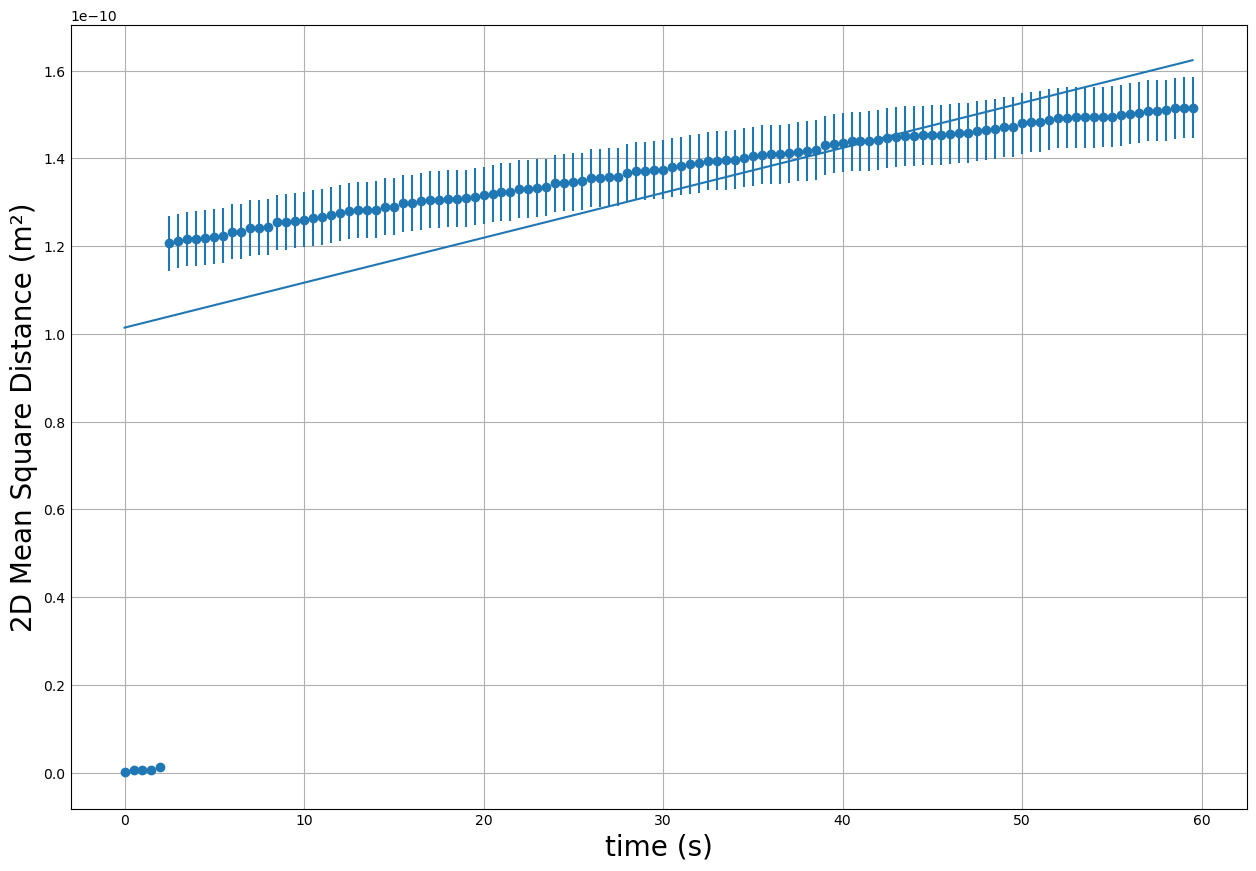

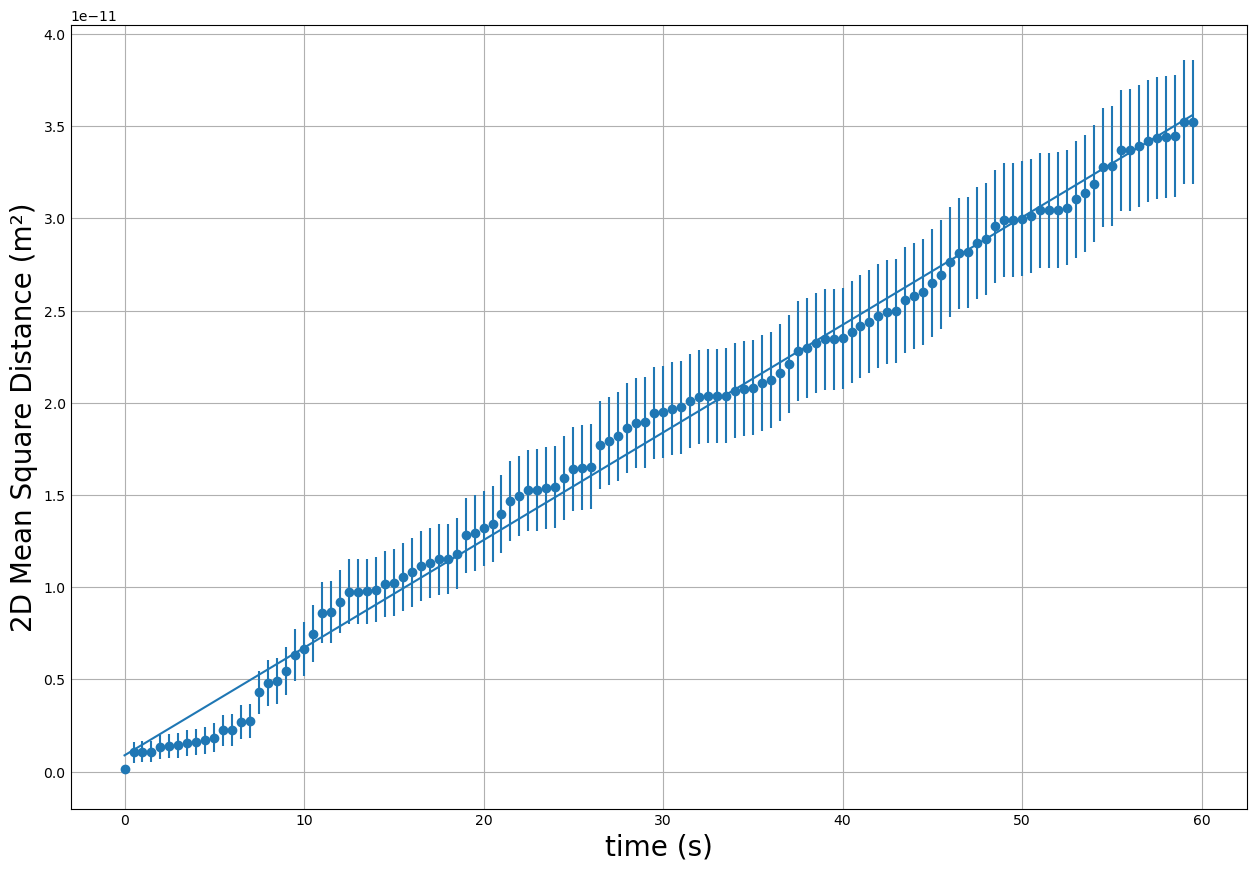

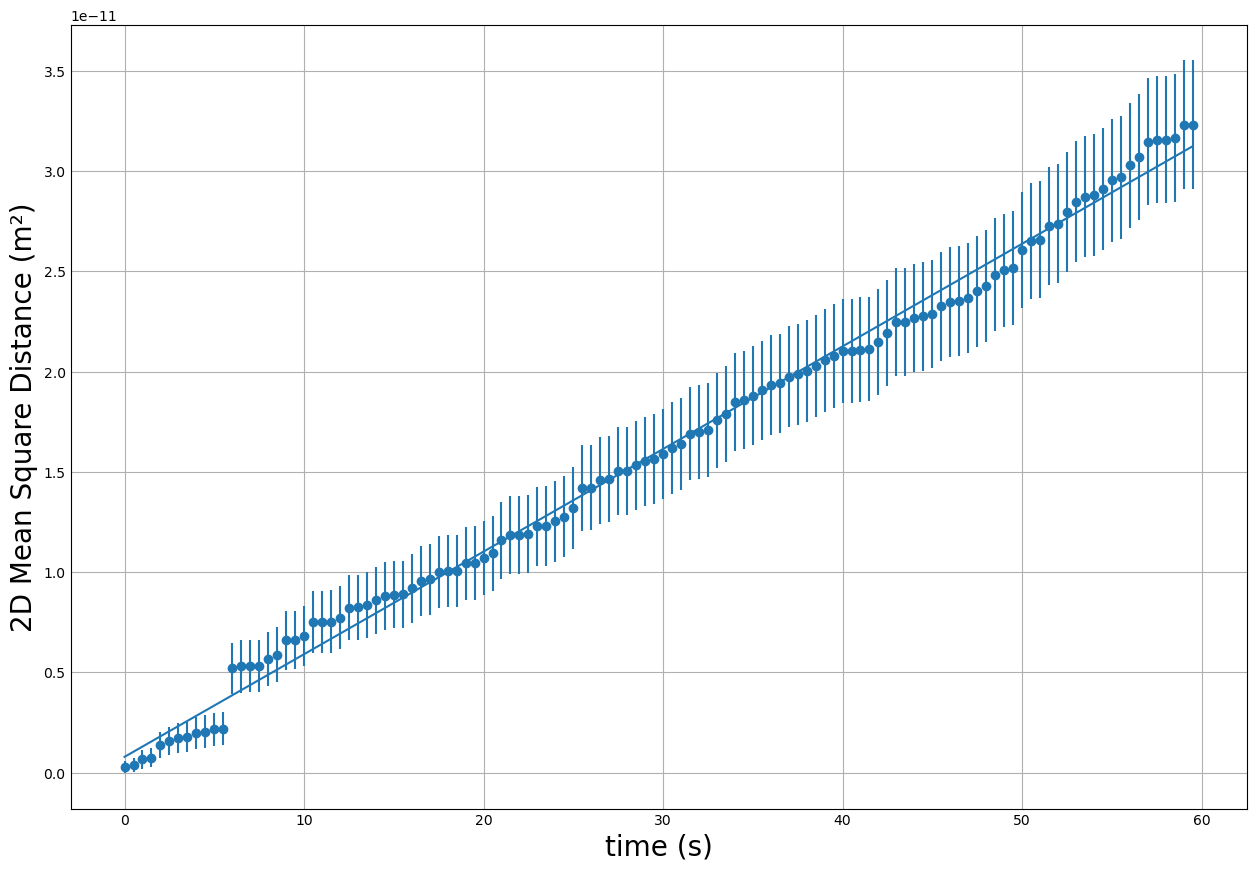

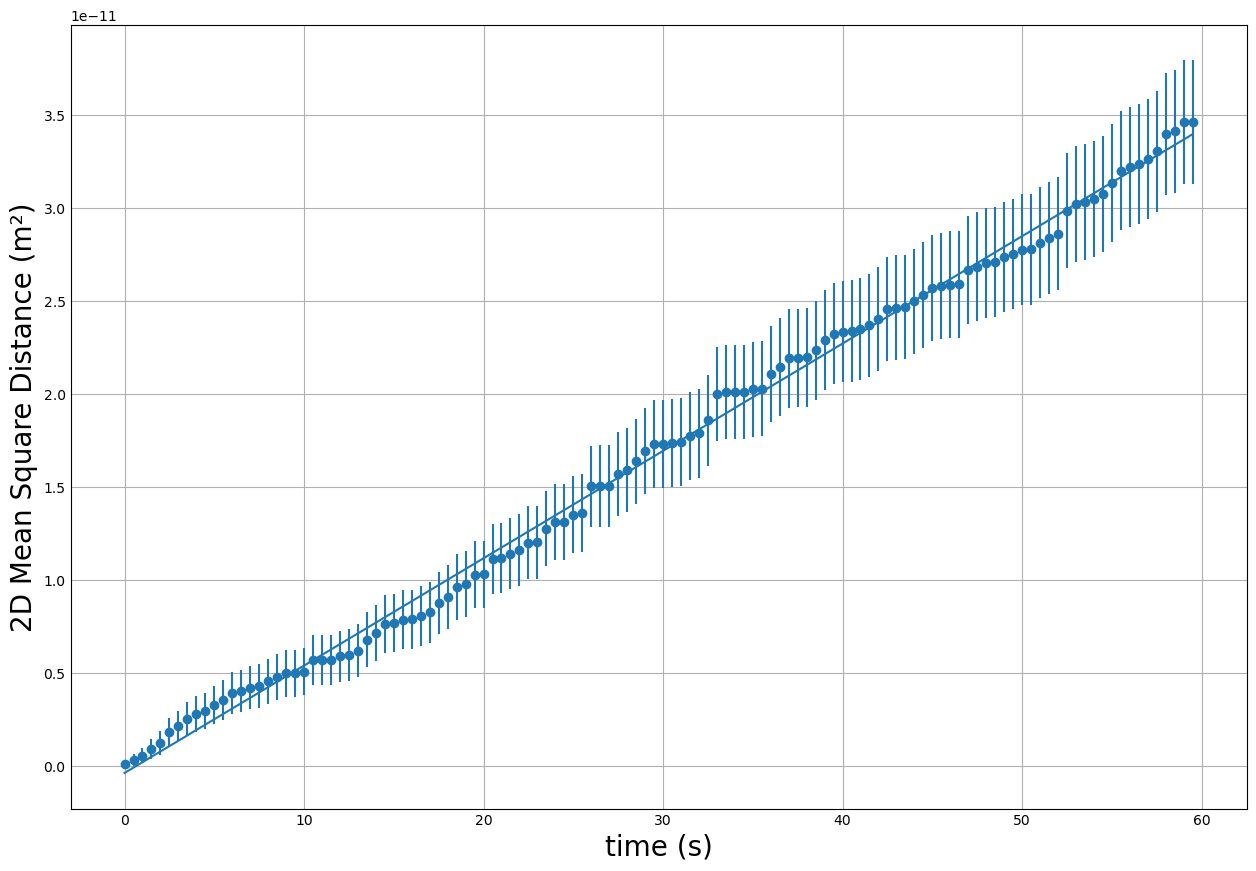

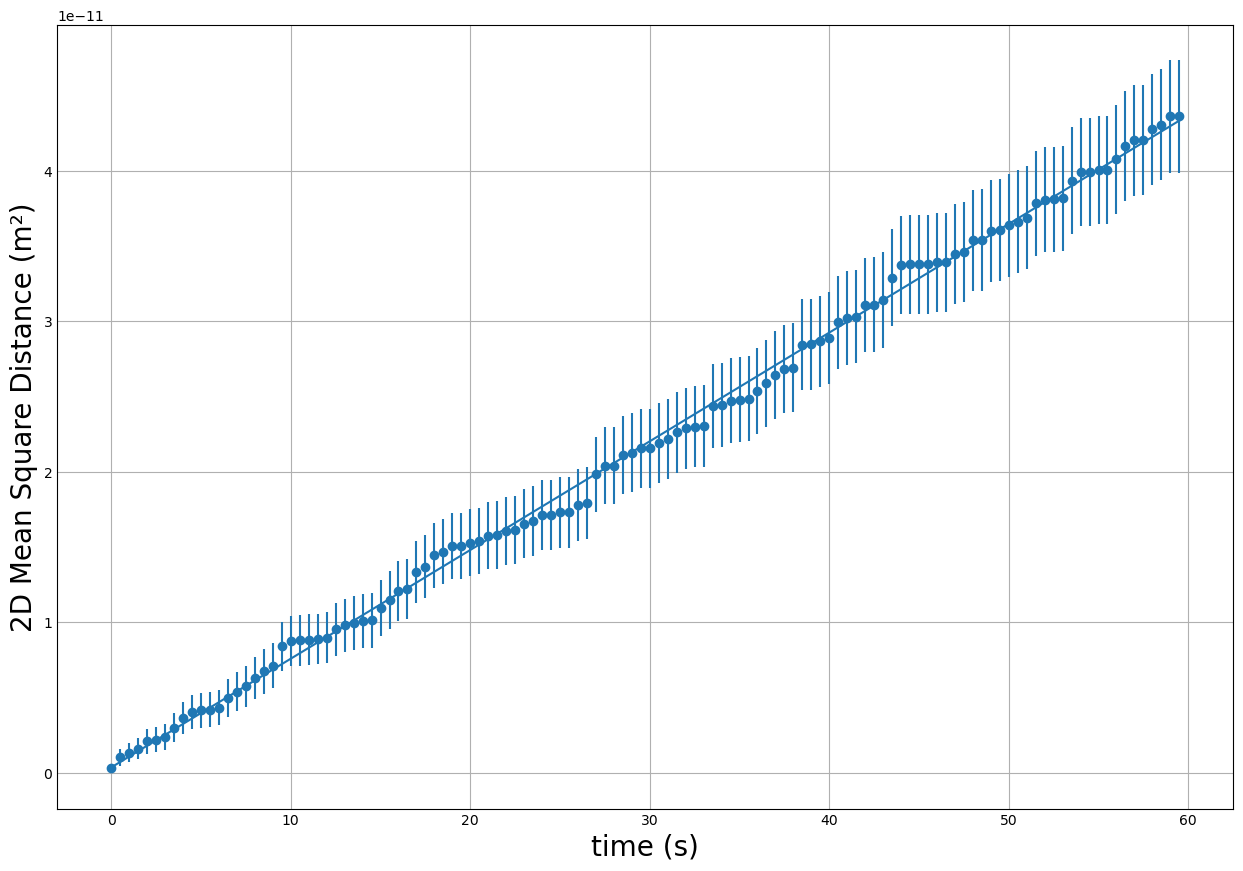

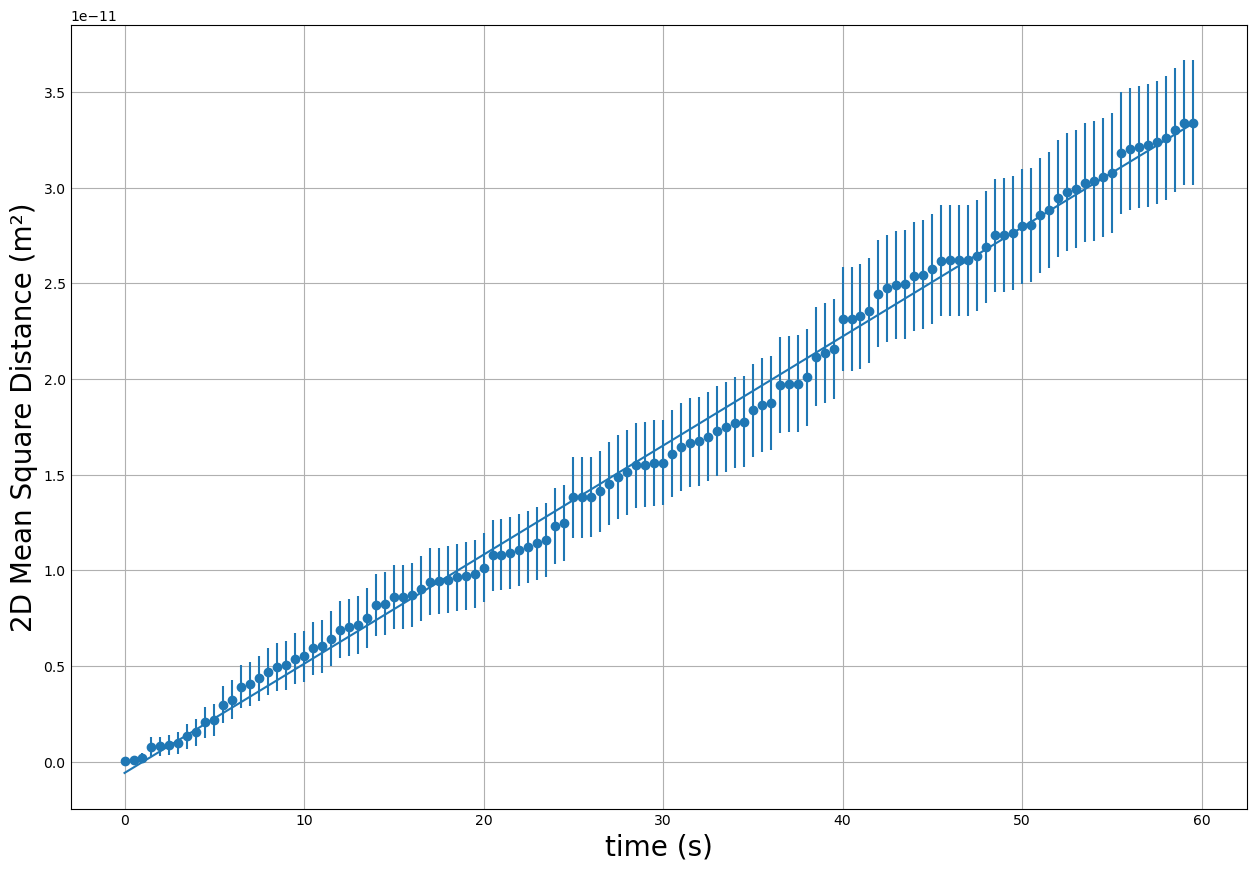

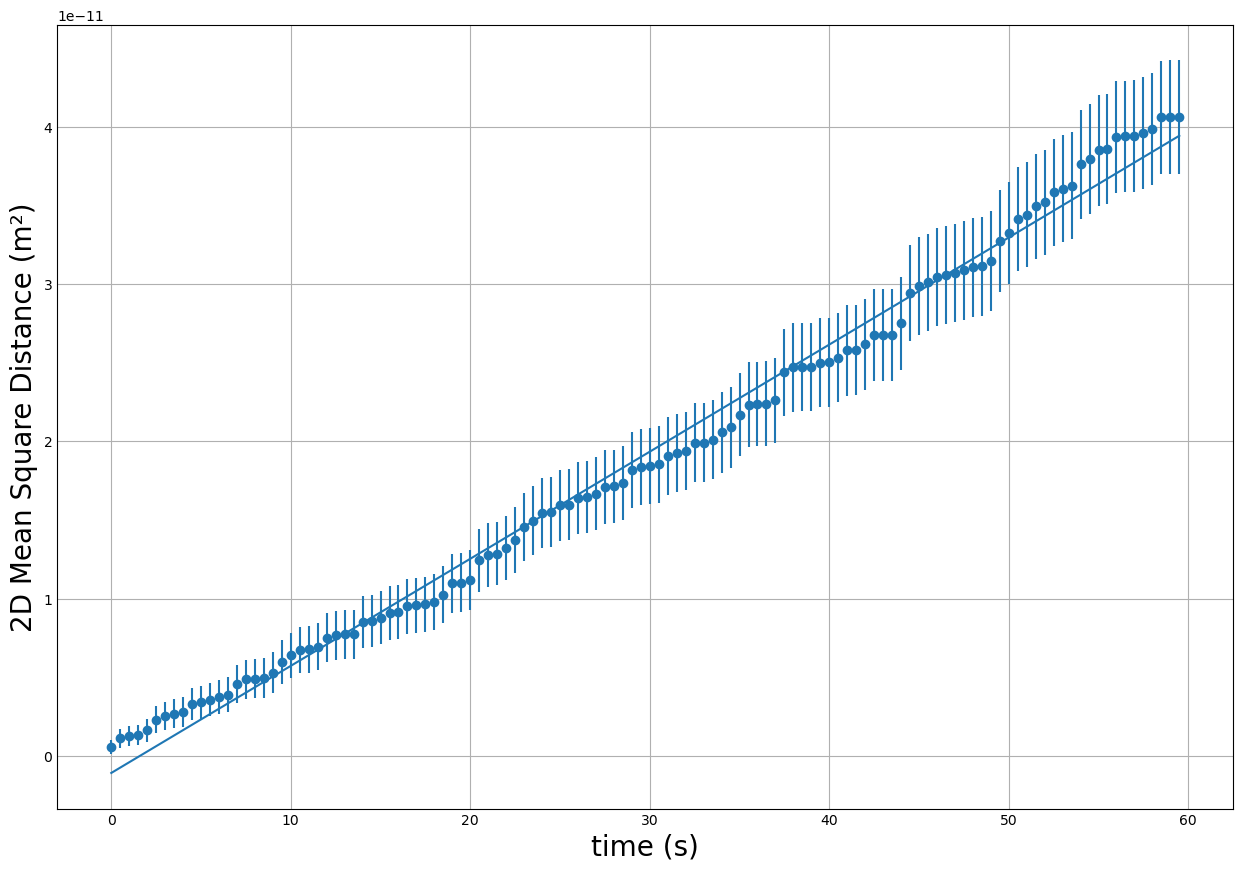

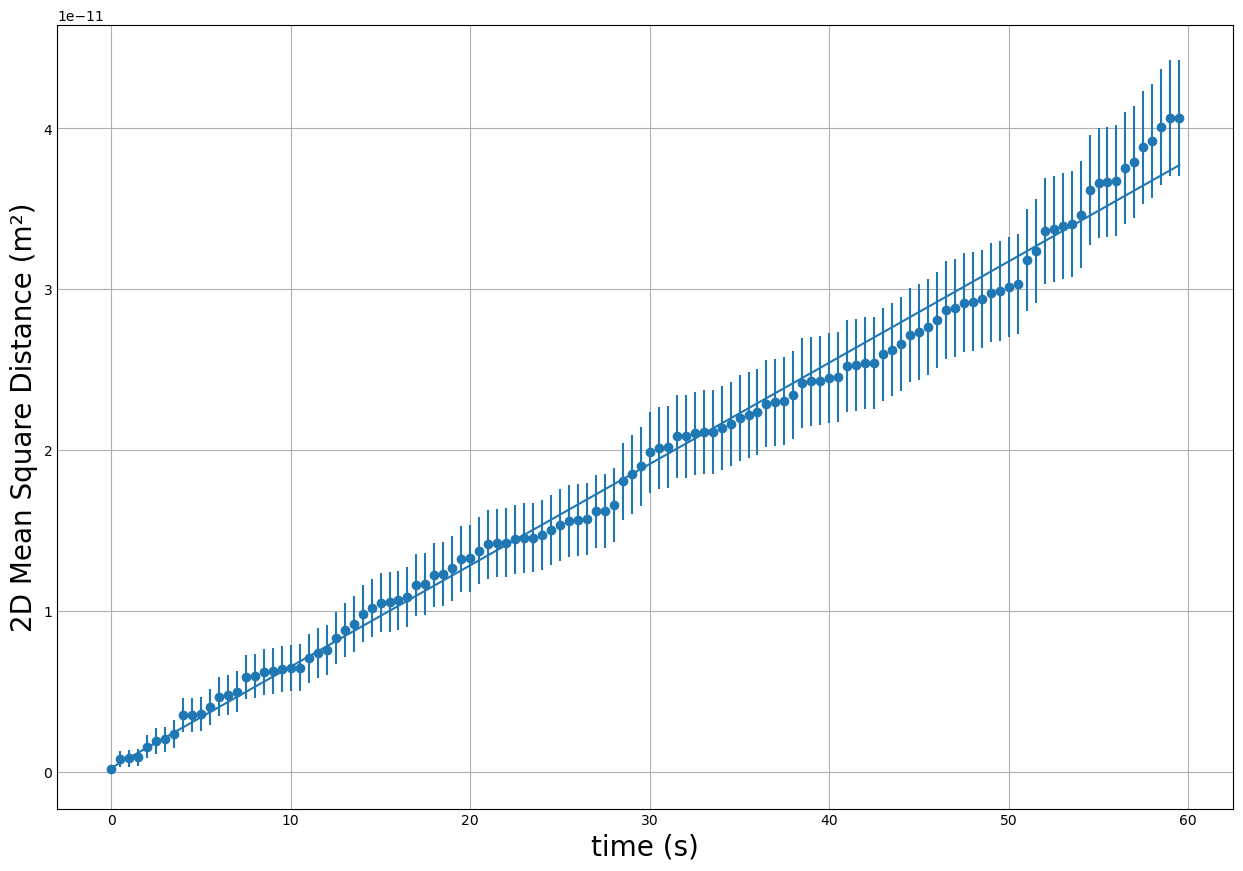

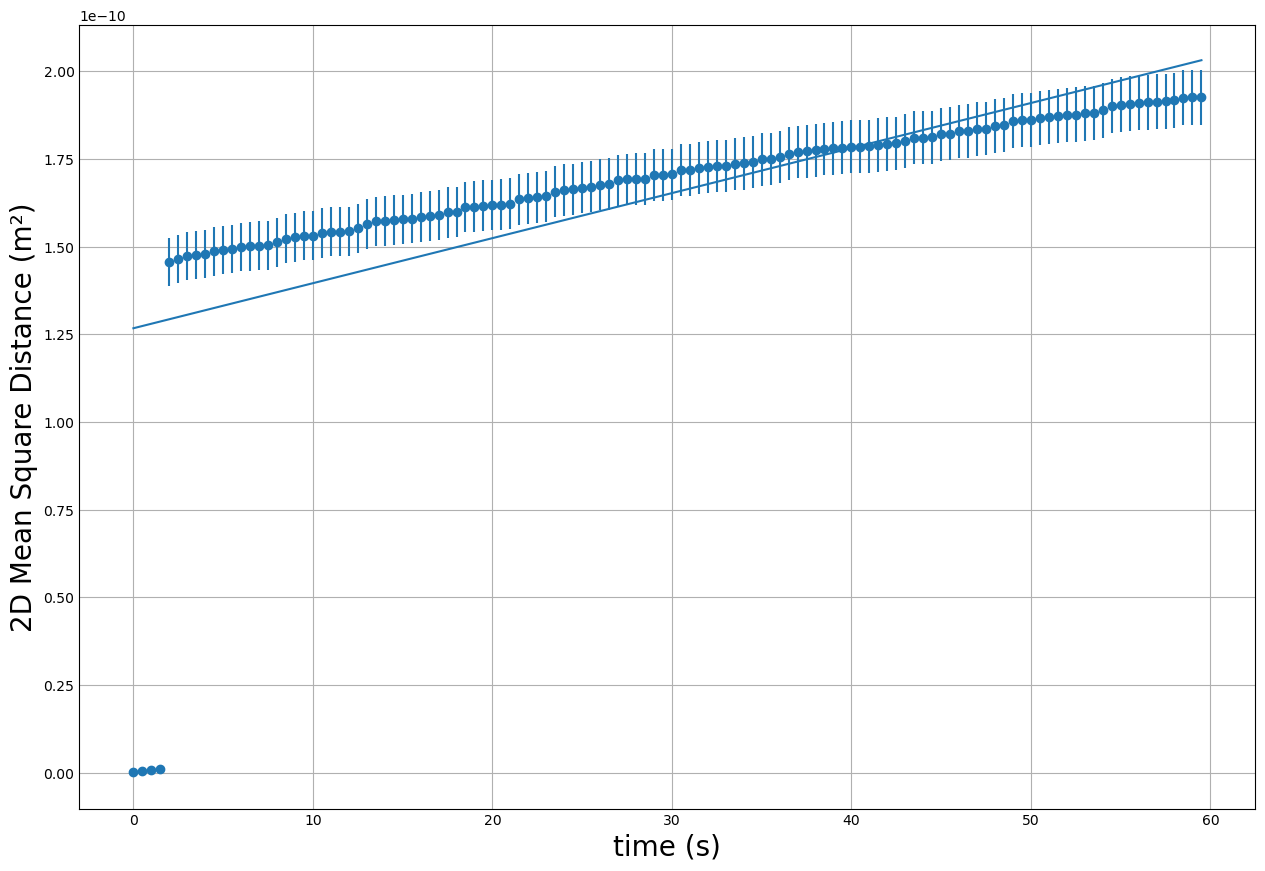

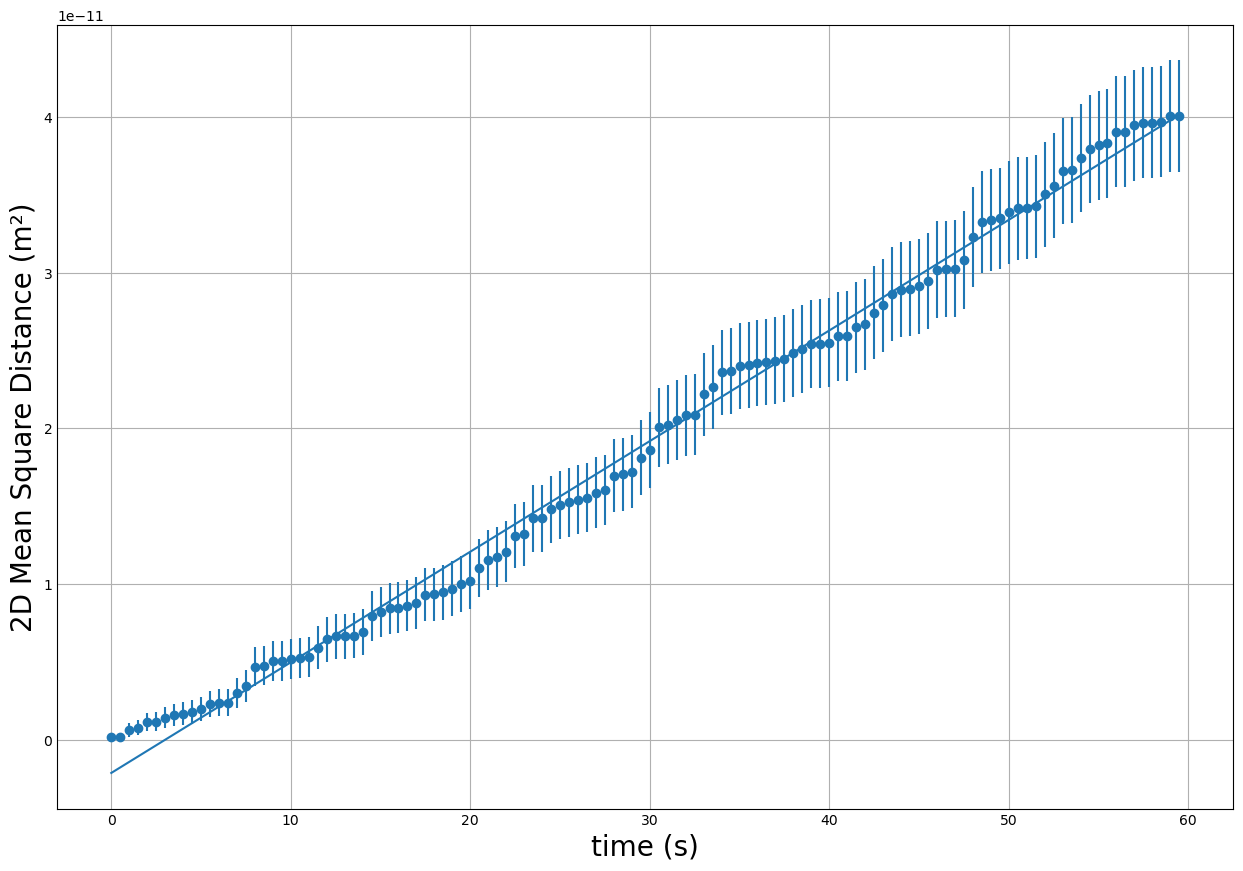

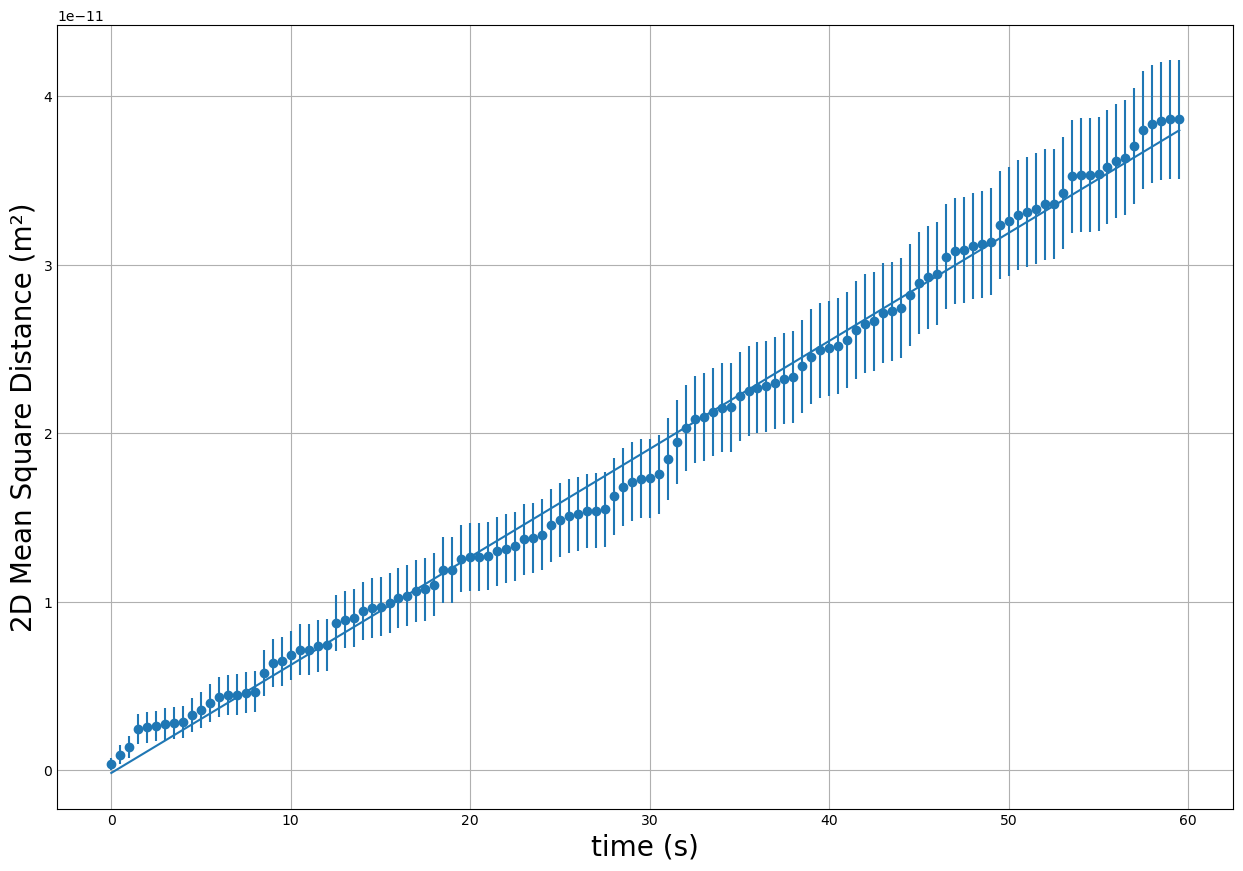

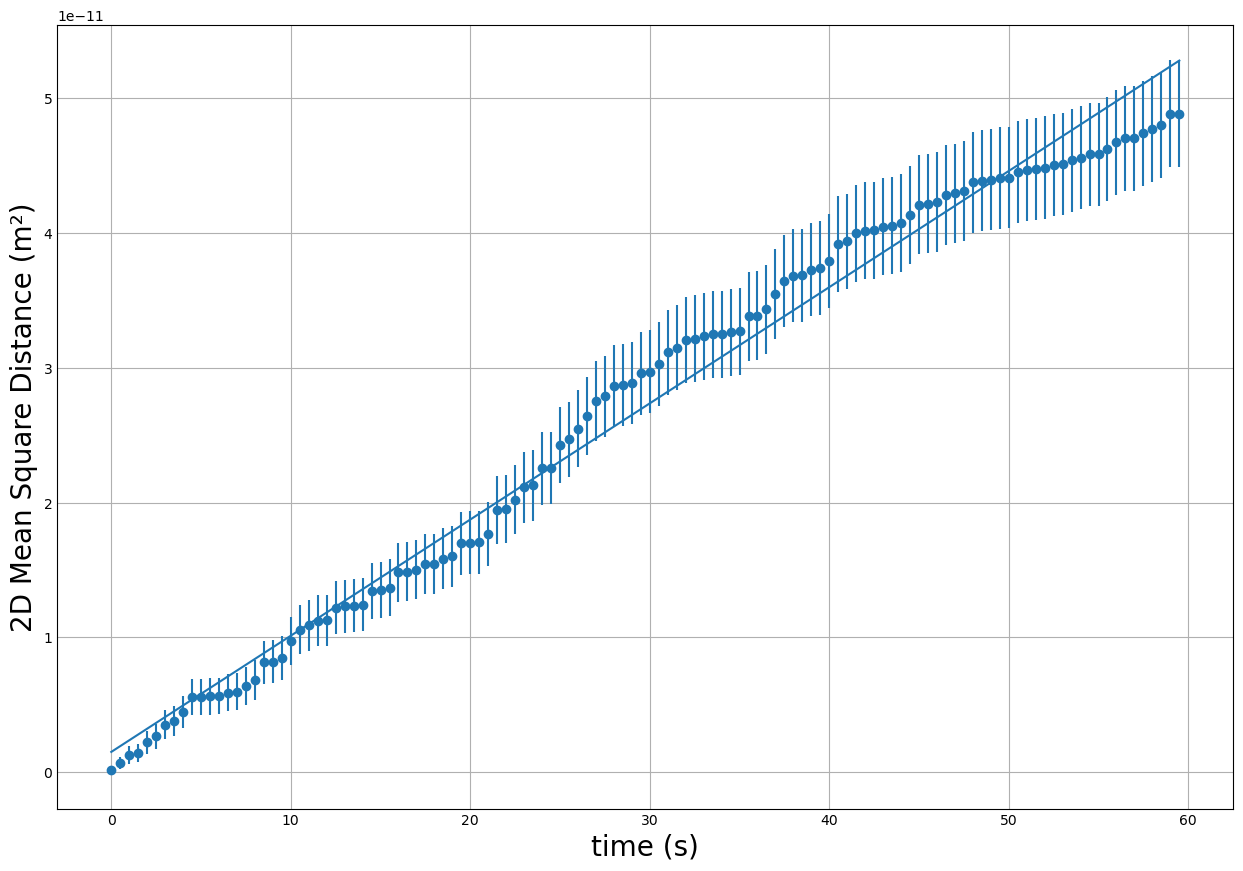

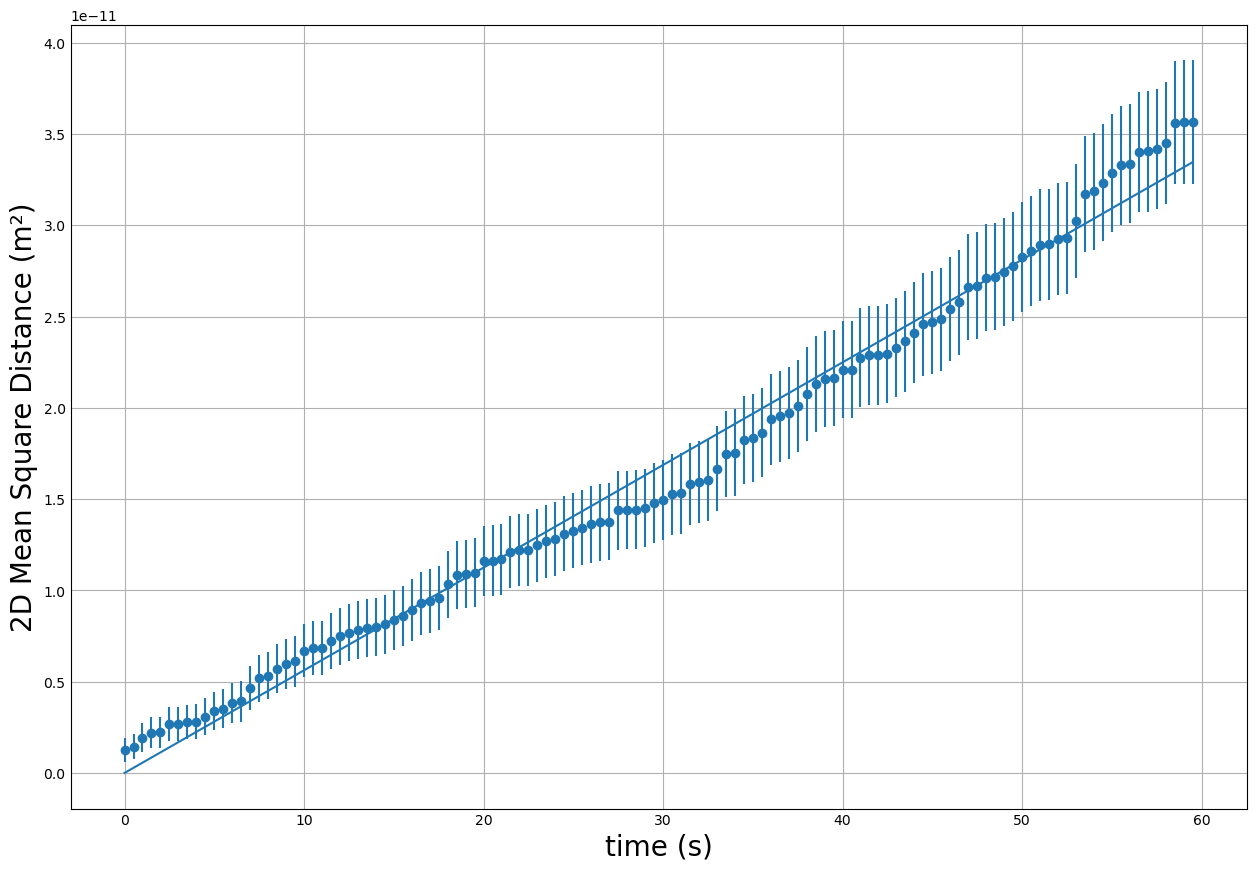

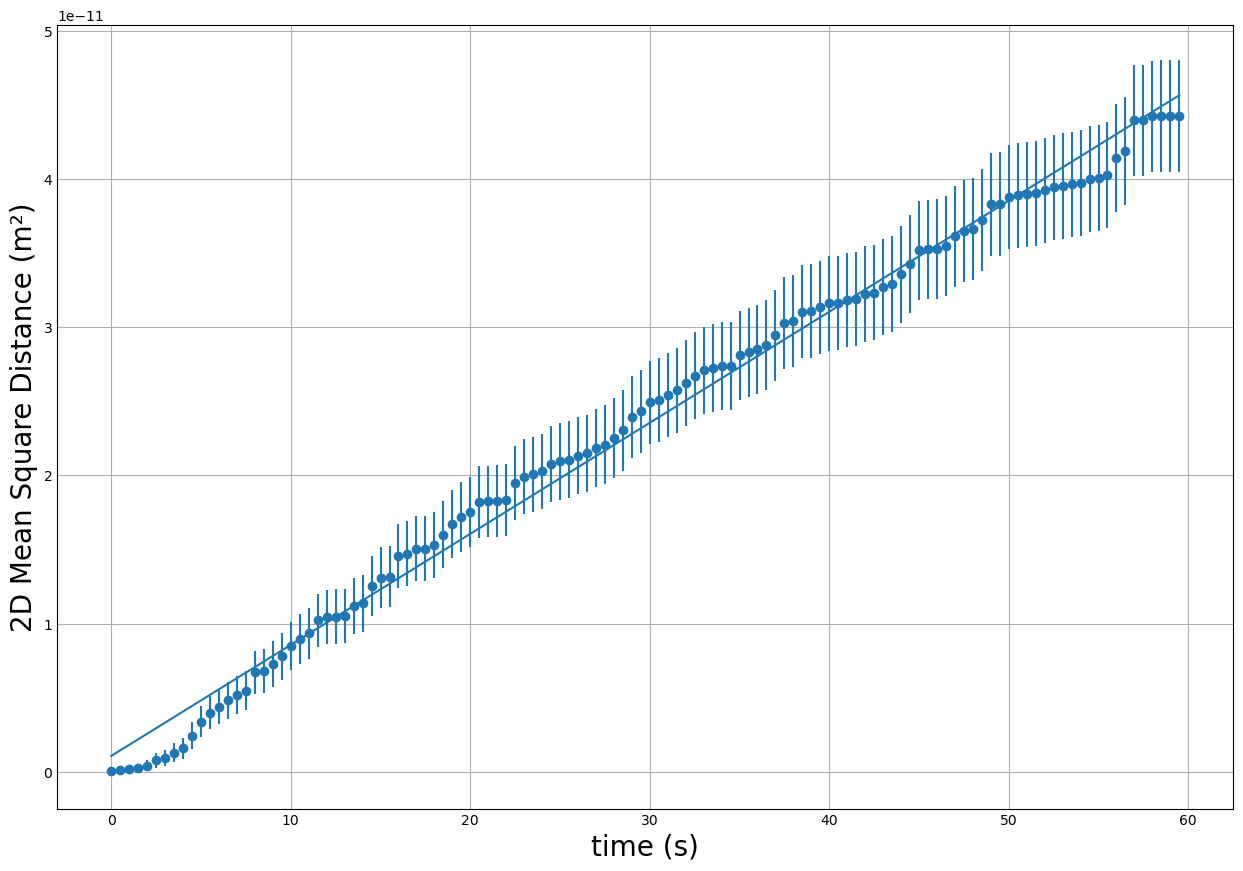

In [5]:
# plot! Will be in 2D
# ignoring outliers for now
# error bars of 0.04 micrometers and 0.03s are too small to see on the graph

a = []
b = []
D = []
k = []

i = 0
for d in df:

    plt.style.use('_mpl-gallery')
    
    # make the data
    x = np.array(d['time'].to_list())
    y = np.array((d['d^2']).to_list())

    # plot
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel("time (s)", fontsize=20)
    ax.set_ylabel("2D Mean Square Distance (m\u00b2)", fontsize=20)
    ax.errorbar(x, y, xerr=x_err, yerr=y_err[i], fmt='none')

    # line of best fit
    a.append(0)
    b.append(0)
    a[i], b[i] = np.polyfit(x, y, 1)
    ax.plot(x, a[i]*x+b[i])

    fig.set_size_inches(12, 8)
    name = "msdtime_" + str(i) + ".png"
    fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

    i += 1

print(a)
print(b)

In [6]:
# outliers - points

df[0]["d^2_g"] = df[0]["d^2"]
df[0]["d^2_g"].iloc[0:5] = np.nan
display(df[0].head(7))

df[8]["d^2_g"] = df[8]["d^2"]
df[8]["d^2_g"].iloc[0:4] = np.nan
display(df[8].head(7))

,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,565.90,1.86,317.80,-2.60,1.481450e-13,NaN
1,0.5,567.76,1.13,315.20,4.85,5.076410e-13,NaN
2,1.0,568.89,1.77,320.05,1.83,6.016022e-13,NaN
3,1.5,570.66,0.52,321.88,-0.43,6.082023e-13,NaN
4,2.0,571.18,6.04,321.45,-2.78,1.249078e-12,NaN
5,2.5,577.22,-48.42,318.67,-76.75,1.206258e-10,1.206258e-10
6,3.0,528.80,3.70,241.92,-5.11,1.212028e-10,1.212028e-10


,time,X (pixels),dx,Y (pixels),dy,d^2,d^2_g
0,0.0,601.73,3.03,109.89,-2.34,2.124630e-13,NaN
1,0.5,604.76,-0.41,107.55,3.96,4.422228e-13,NaN
2,1.0,604.35,2.53,111.51,4.16,7.858760e-13,NaN
3,1.5,606.88,-2.16,115.67,-4.84,1.193091e-12,NaN
4,2.0,604.72,61.52,110.83,-78.63,1.456819e-10,1.456819e-10
5,2.5,666.24,2.81,32.20,-6.57,1.464221e-10,1.464221e-10
6,3.0,669.05,6.26,25.63,4.49,1.472824e-10,1.472824e-10


5.423745338098619e-13 1.207965739661005e-10


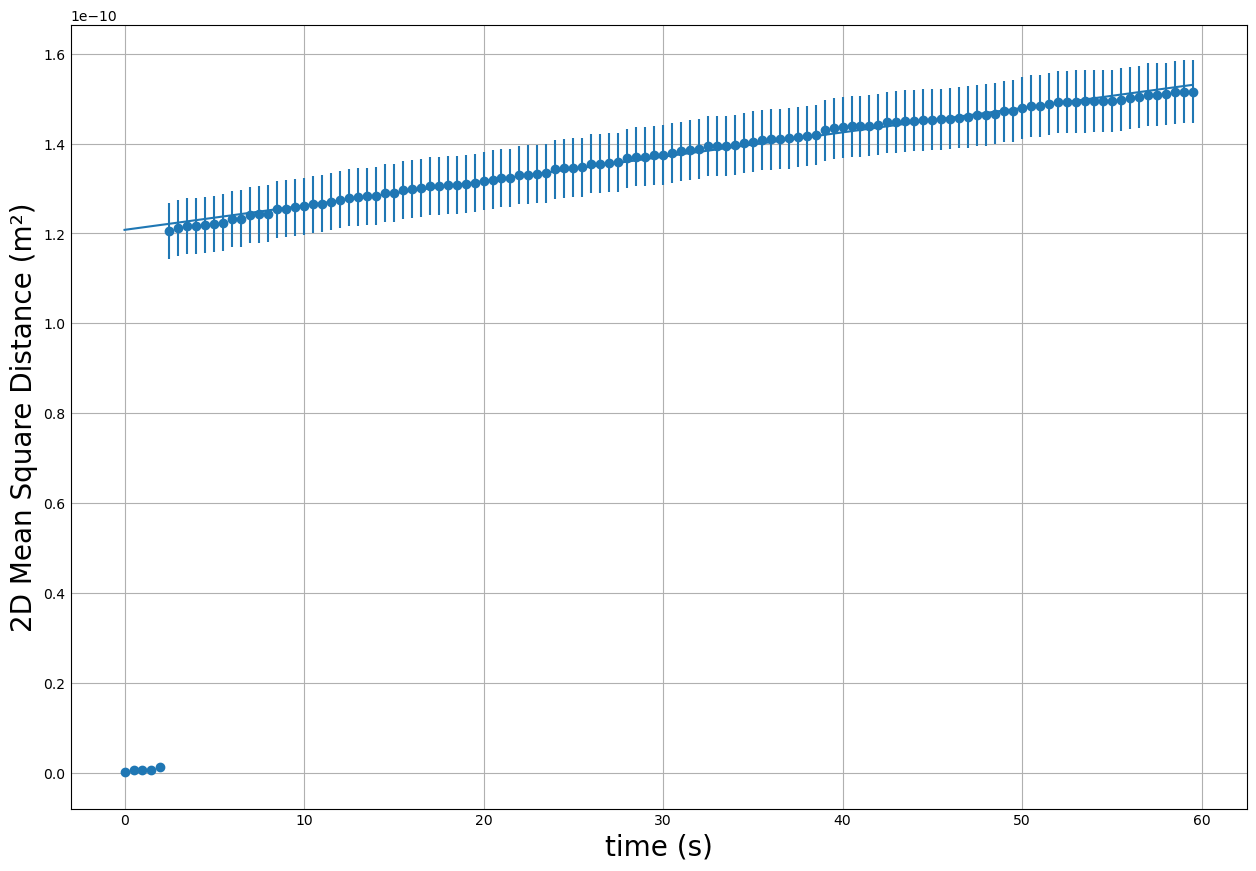

In [7]:
# plot them again

# 0

# make the data
x = np.array(df[0]['time'].to_list())
y = np.array((df[0]['d^2']).to_list())
y_g = np.array((df[0]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)", fontsize=20)
ax.set_ylabel("2D Mean Square Distance (m\u00b2)", fontsize=20)
ax.errorbar(x, y, xerr=x_err, yerr=y_err[0], fmt='none')

# line of best fit
a[0], b[0] = np.polyfit(x[5:], y_g[5:], 1)
print(a[0], b[0])
ax.plot(x, a[0]*x+b[0])

fig.set_size_inches(12, 8)
name = "msdtime_0.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

8.154004518407544e-13 1.4552274059315256e-10


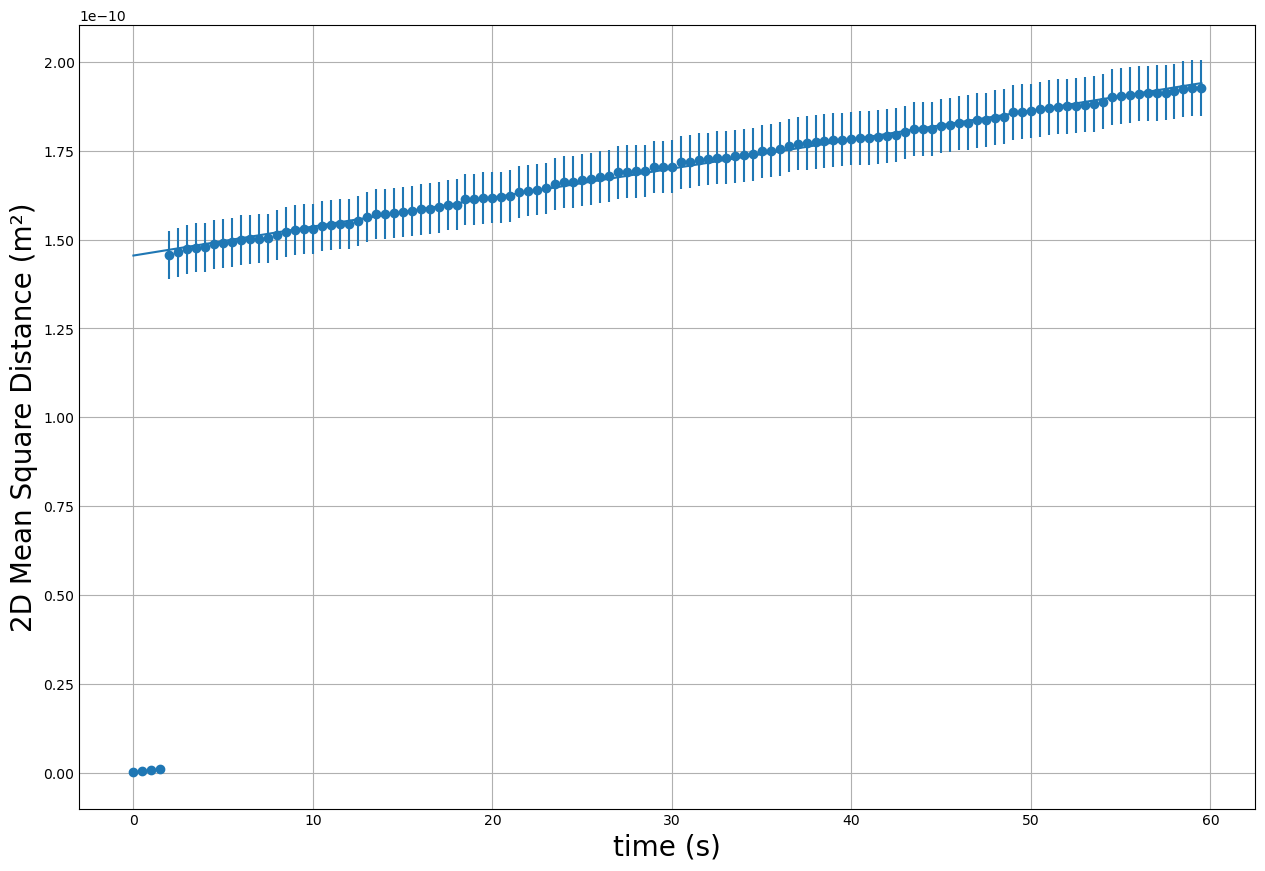

In [8]:
# 8

# make the data
x = np.array(df[8]['time'].to_list())
y = np.array((df[8]['d^2']).to_list())
y_g = np.array((df[8]['d^2_g']).to_list())

# plot
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("time (s)", fontsize=20)
ax.set_ylabel("2D Mean Square Distance (m\u00b2)", fontsize=20)
ax.errorbar(x, y, xerr=x_err, yerr=y_err[8], fmt='none')

# line of best fit
a[8], b[8] = np.polyfit(x[4:], y_g[4:], 1)
print(a[8], b[8])
ax.plot(x, a[8]*x+b[8])

fig.set_size_inches(12, 8)
name = "msdtime_8.png"
fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

### Goodness of Fit
Residuals

[5.423745338098619e-13, 5.836100687668759e-13, 5.115564994957338e-13, 5.772960285656097e-13, 7.224381959420677e-13, 5.702586981975686e-13, 6.805879189900916e-13, 6.295305432338269e-13, 8.154004518407544e-13, 7.105324903109097e-13, 6.408346117736446e-13, 8.619413546019267e-13, 5.620129598578103e-13, 7.493071830685383e-13]
[1.207965739661005e-10, 8.806985000210931e-13, 7.91356066815542e-13, -3.8315557071755917e-13, 3.539626637974804e-13, -5.960182058772723e-13, -1.0742948911343964e-12, 2.6240664998786757e-13, 1.4552274059315256e-10, -2.1350232582142175e-12, -1.6309998988540032e-13, 1.5027515972071072e-12, 8.740368222443797e-15, 1.0707505642403397e-12]


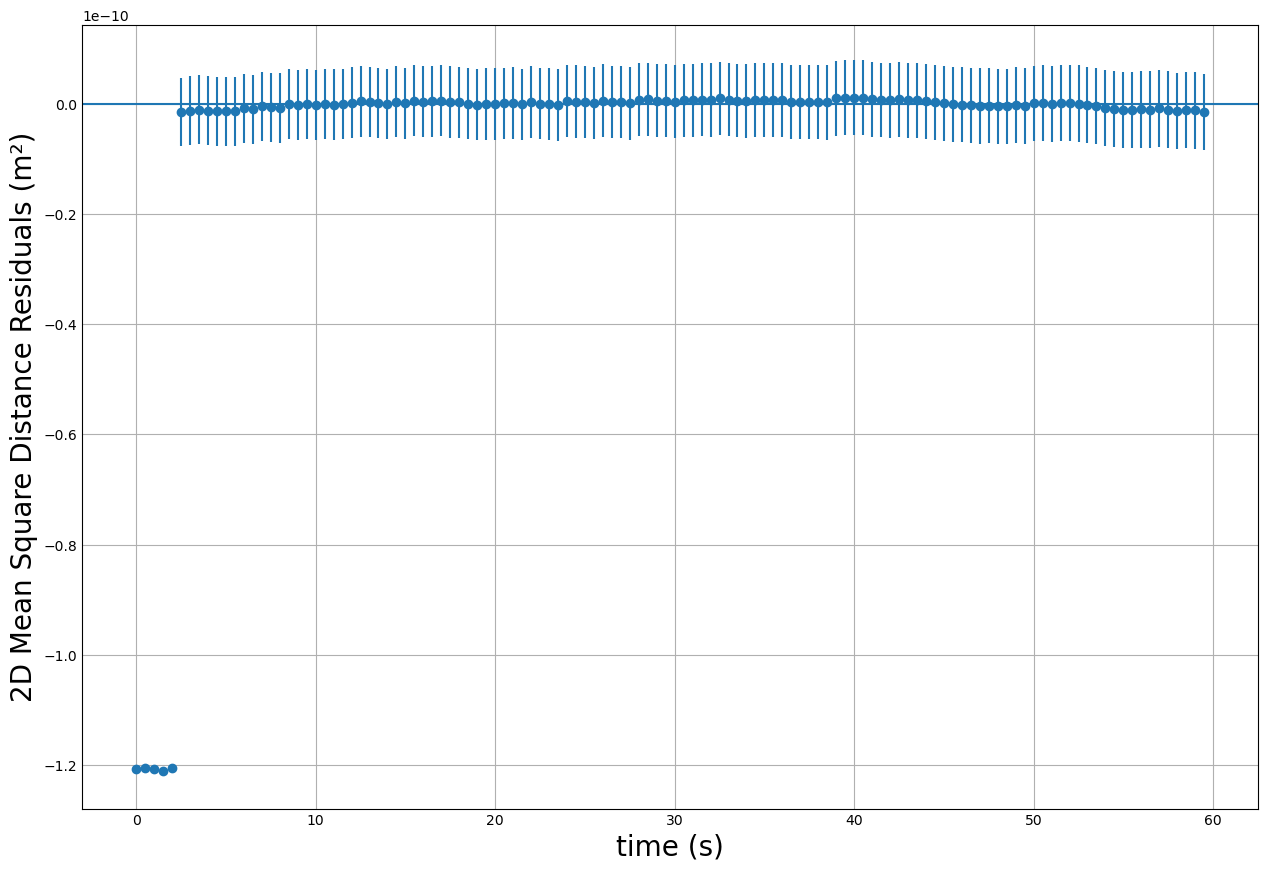

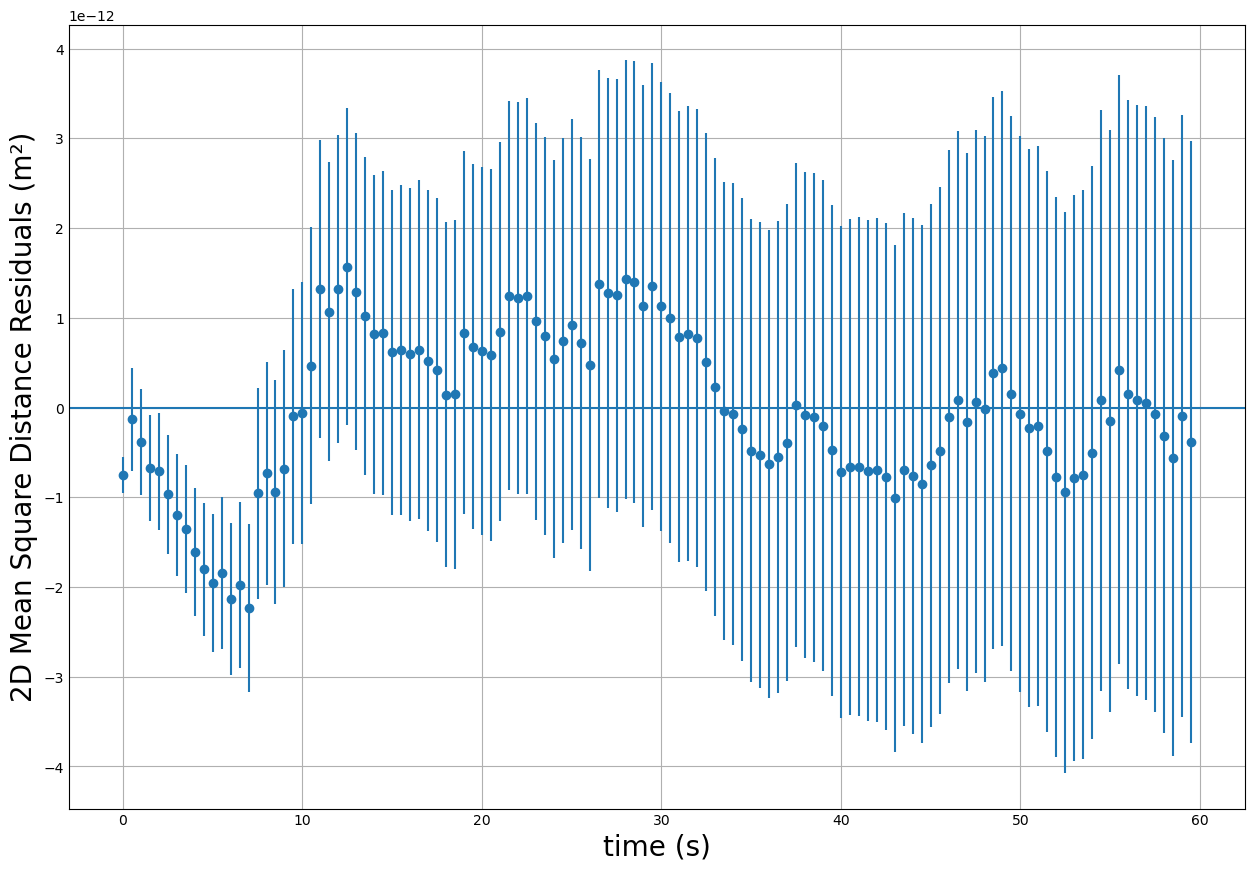

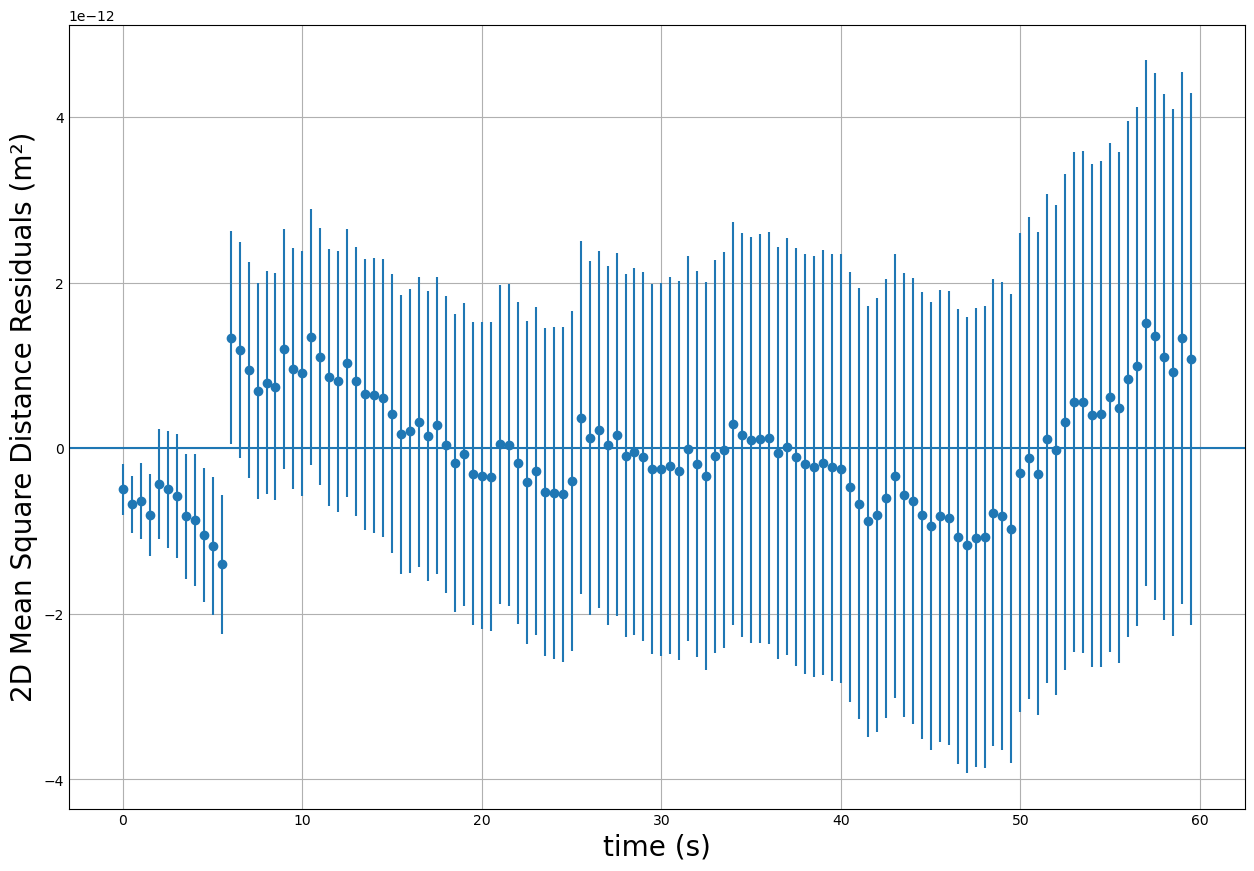

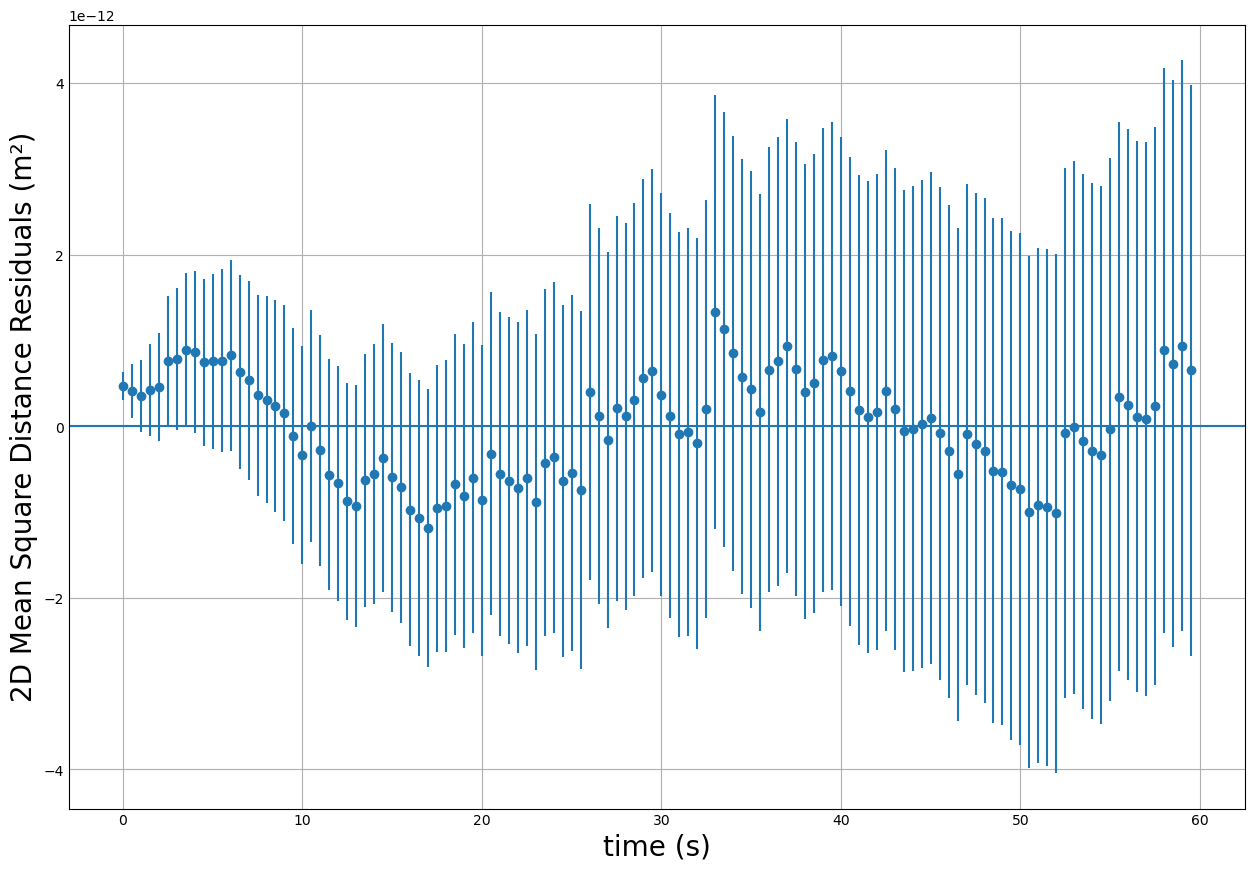

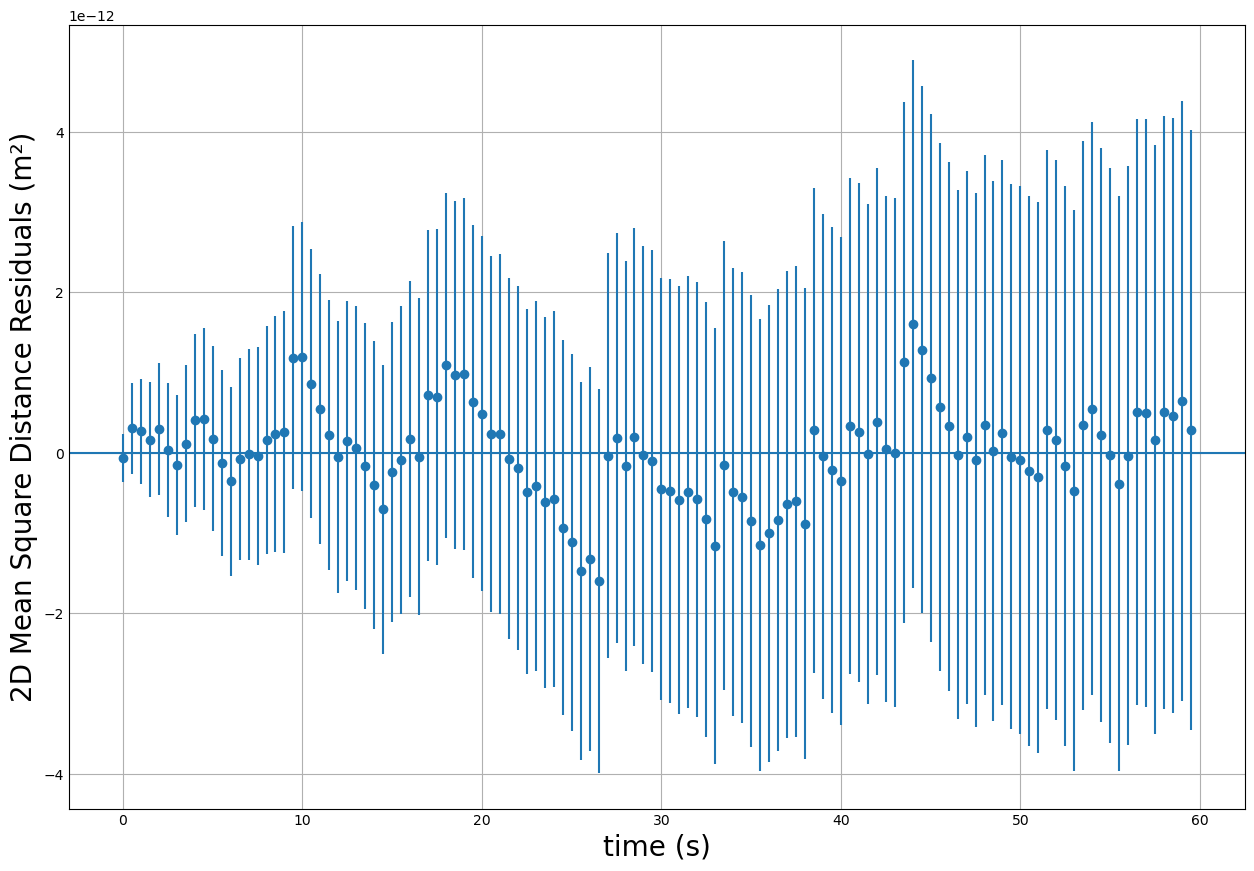

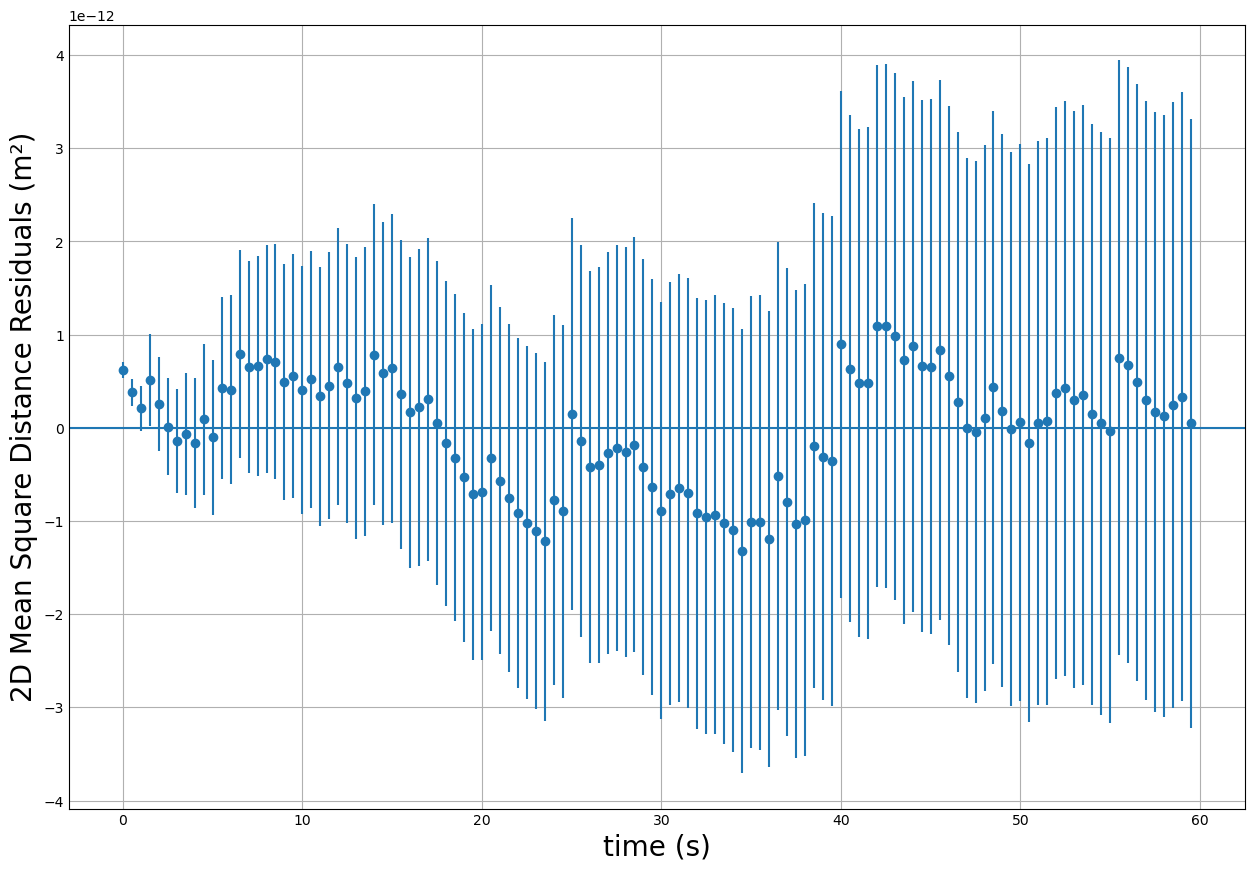

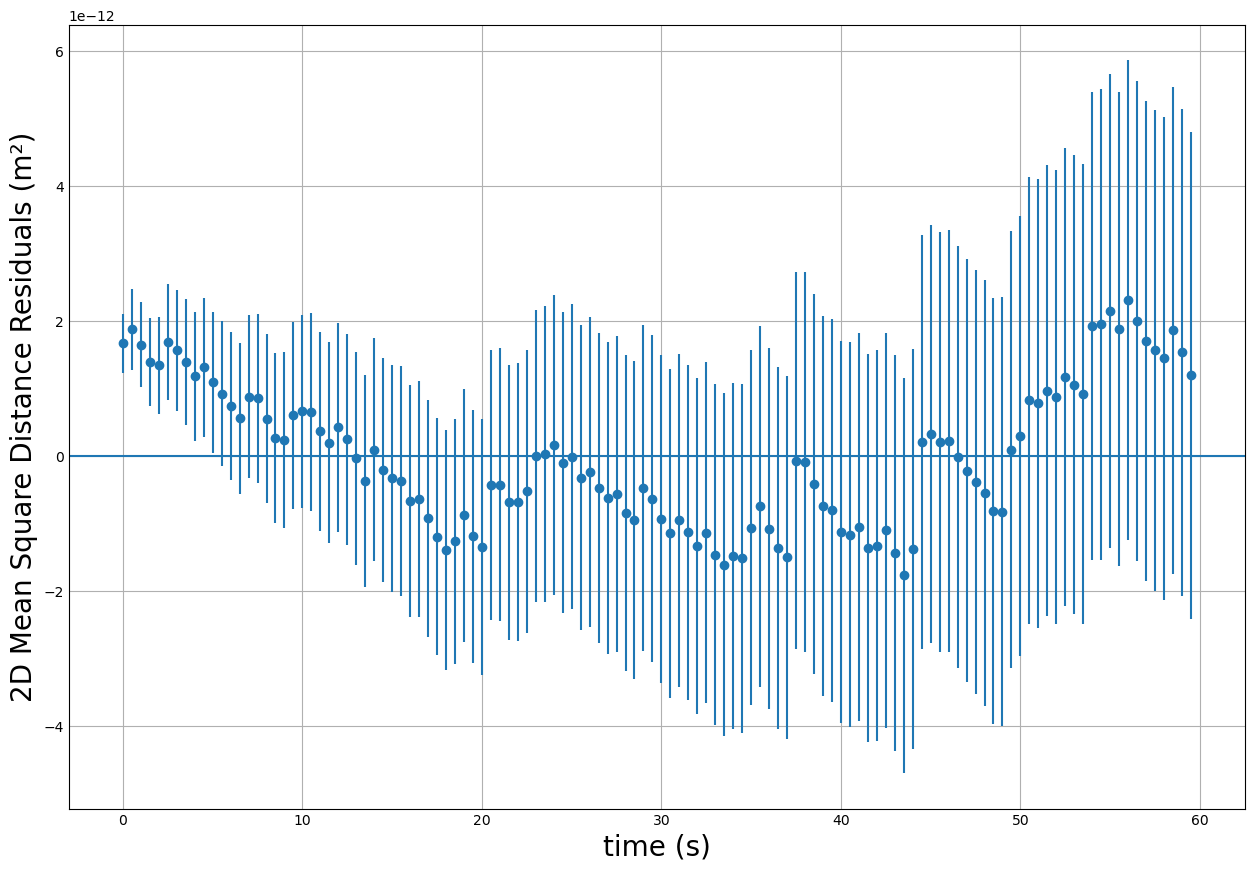

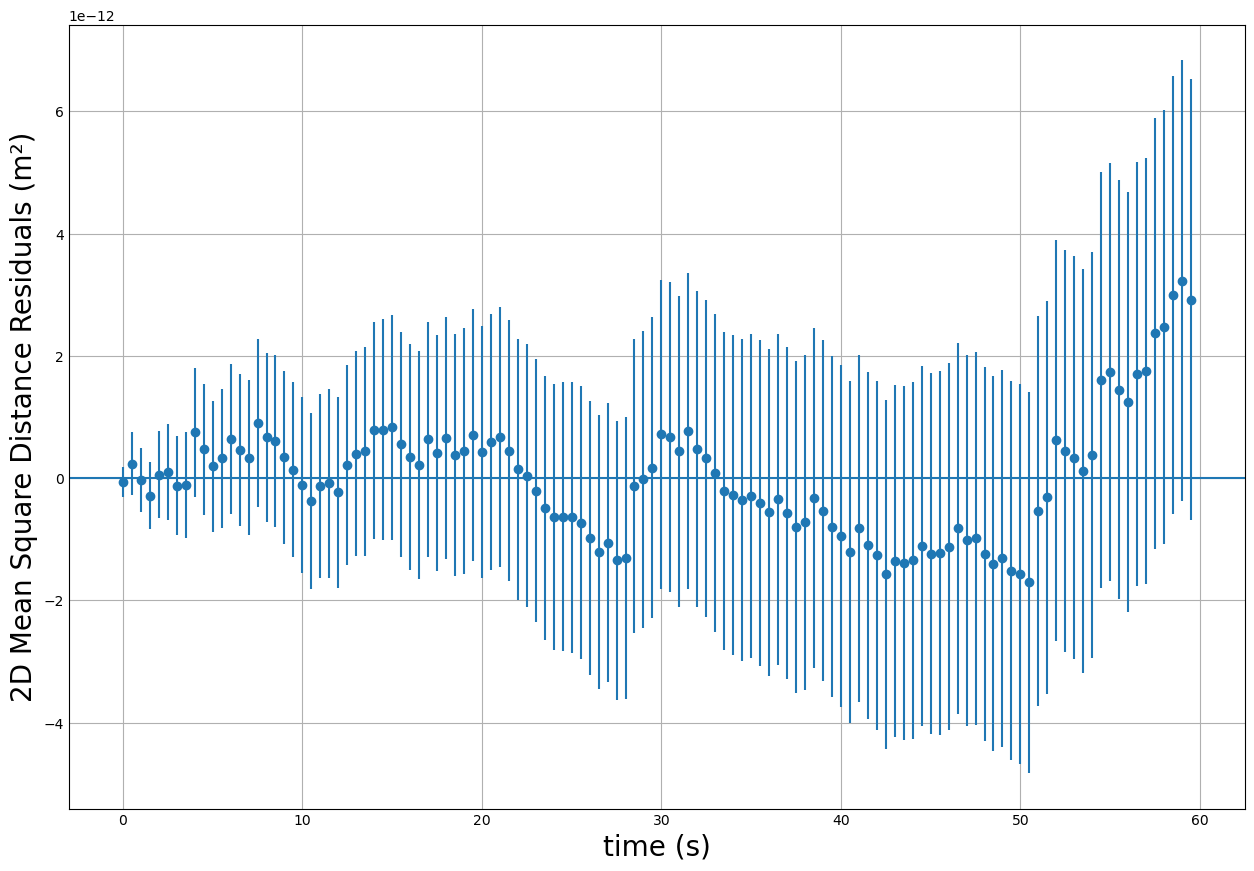

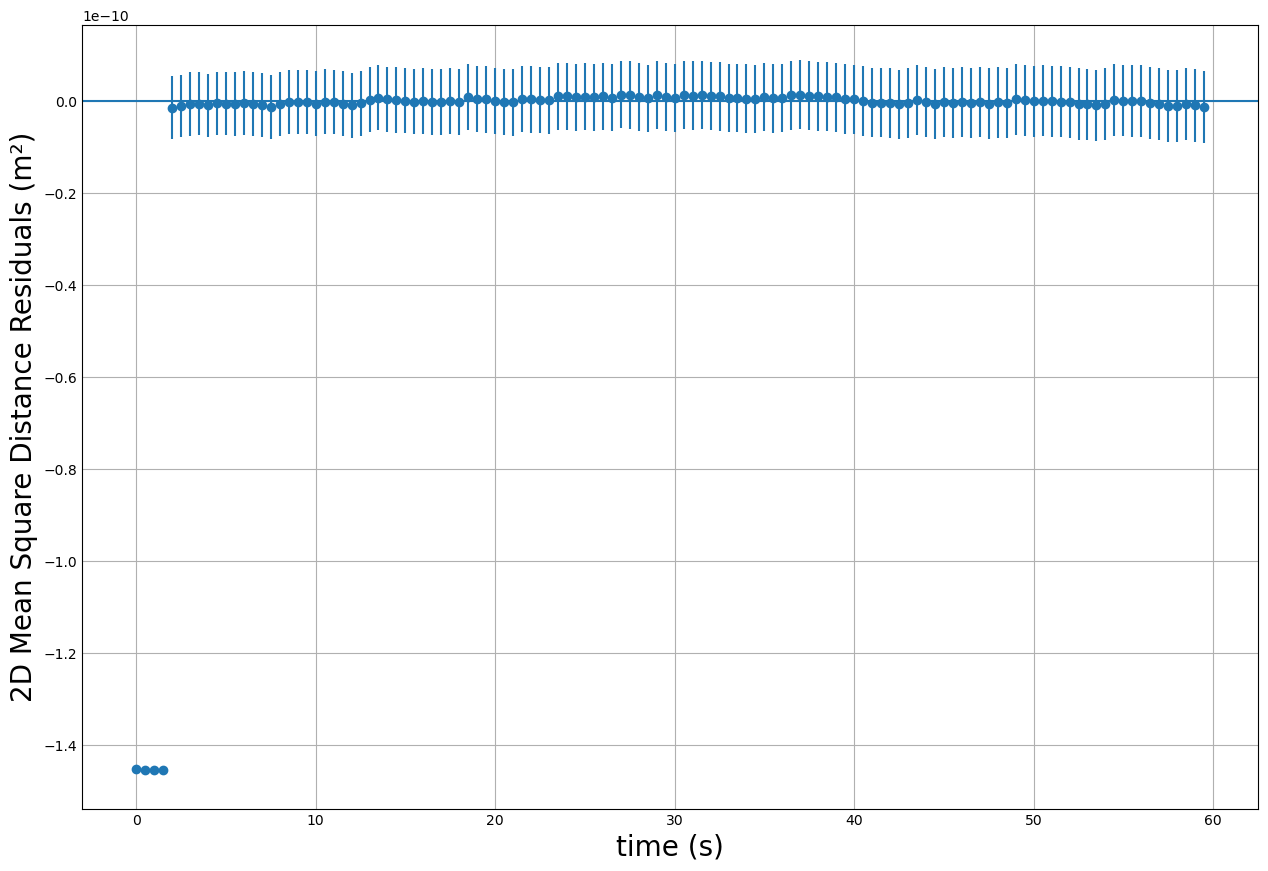

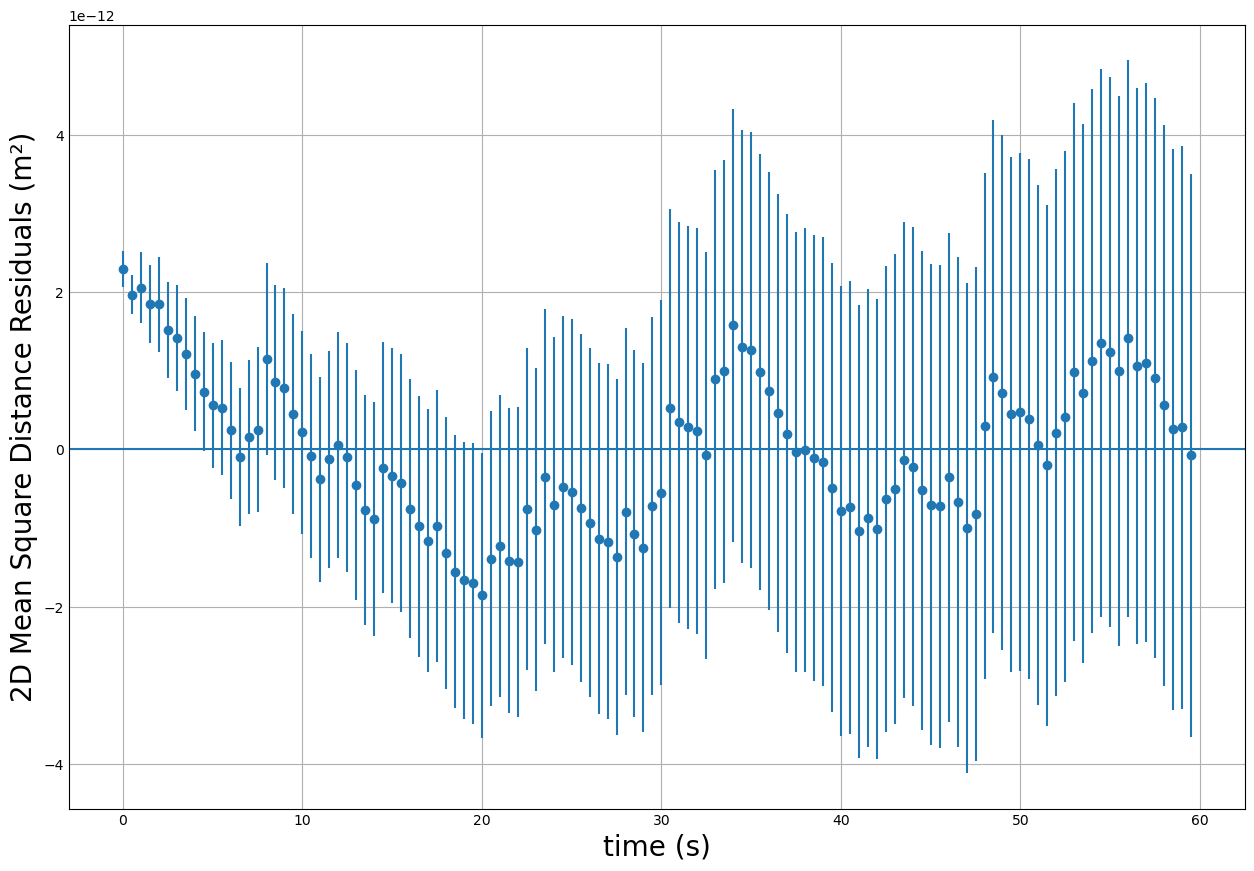

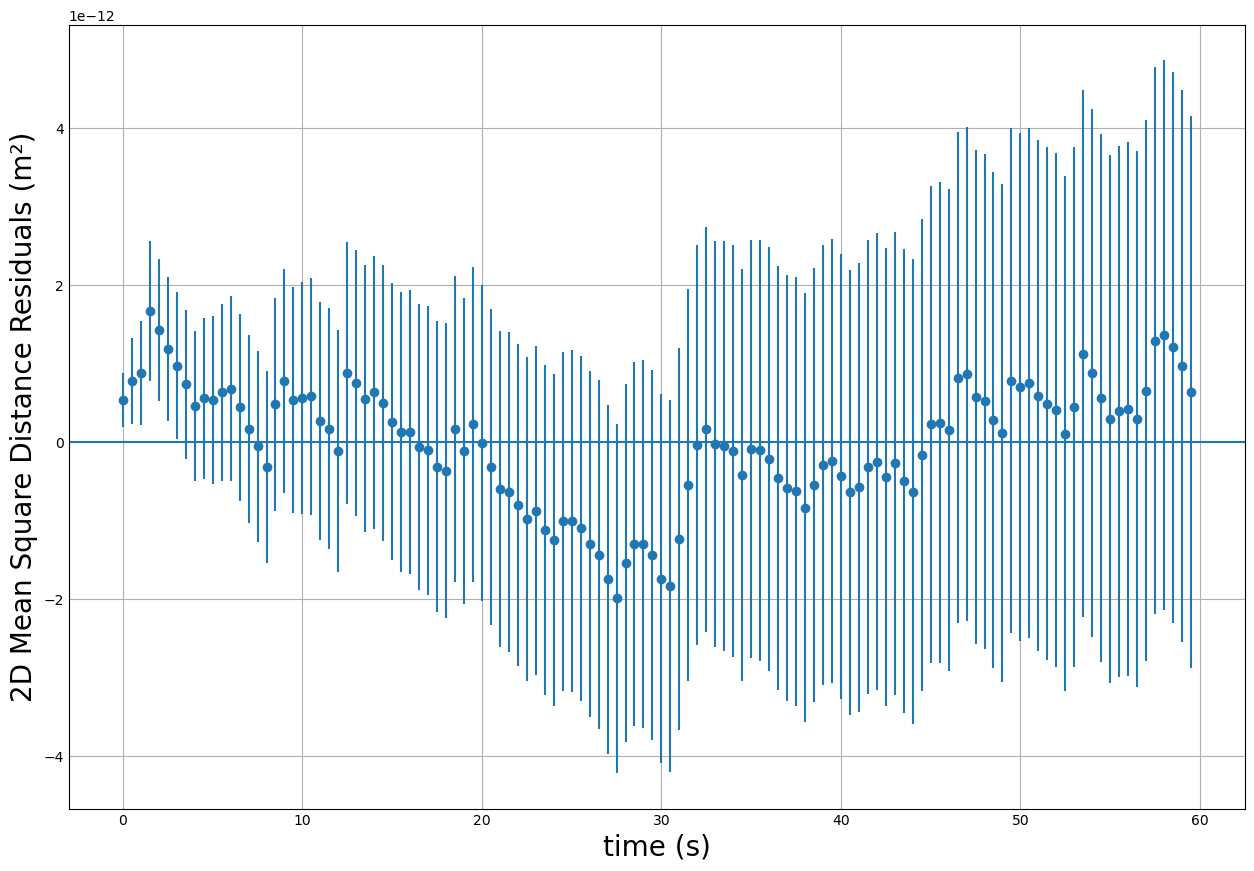

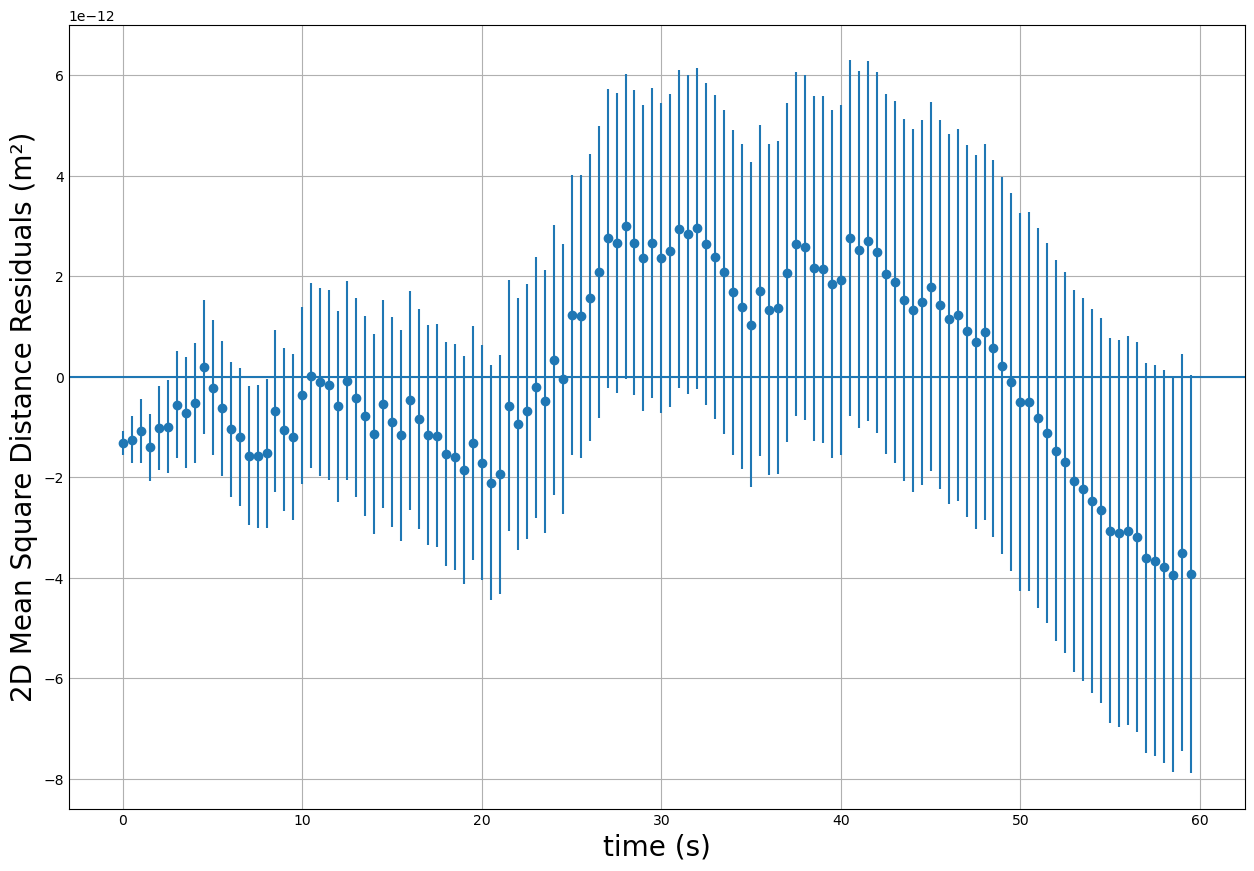

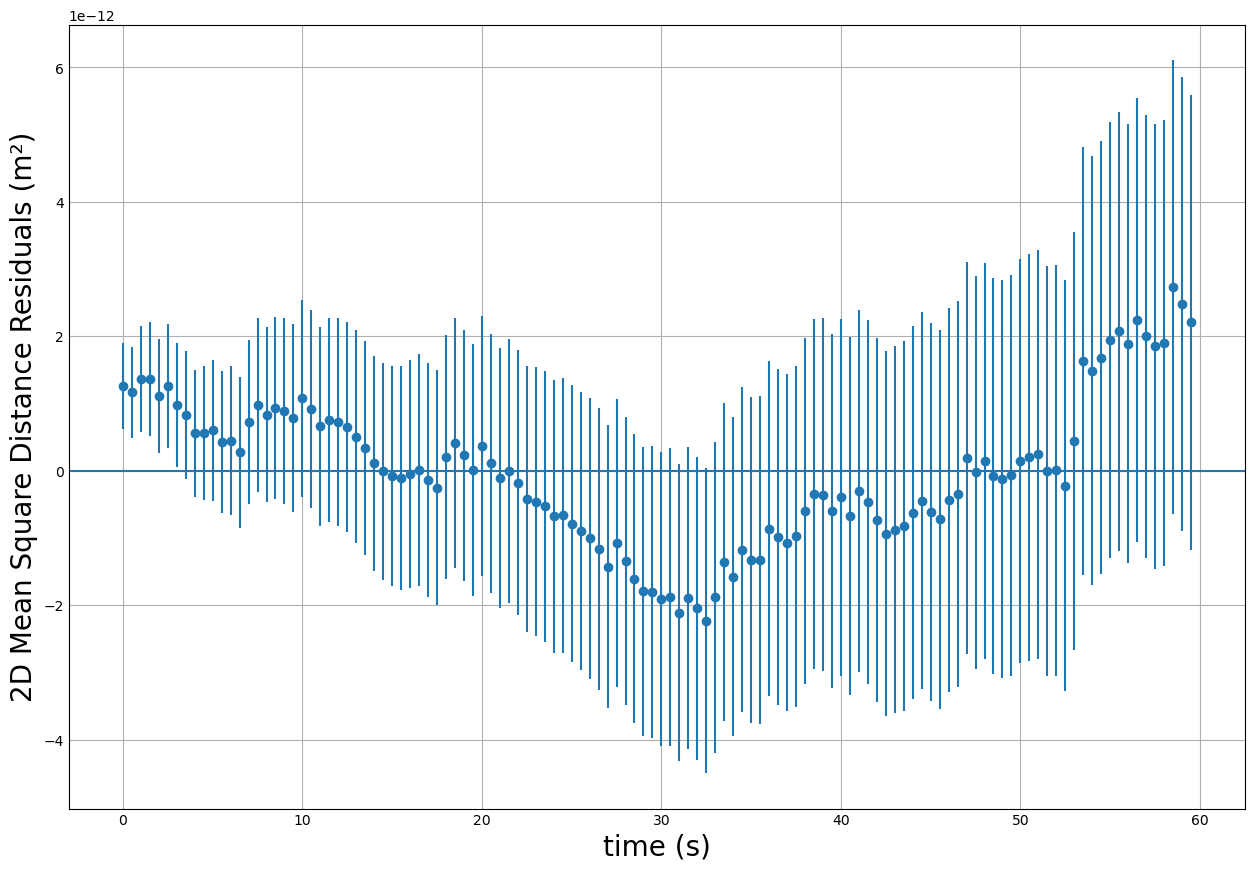

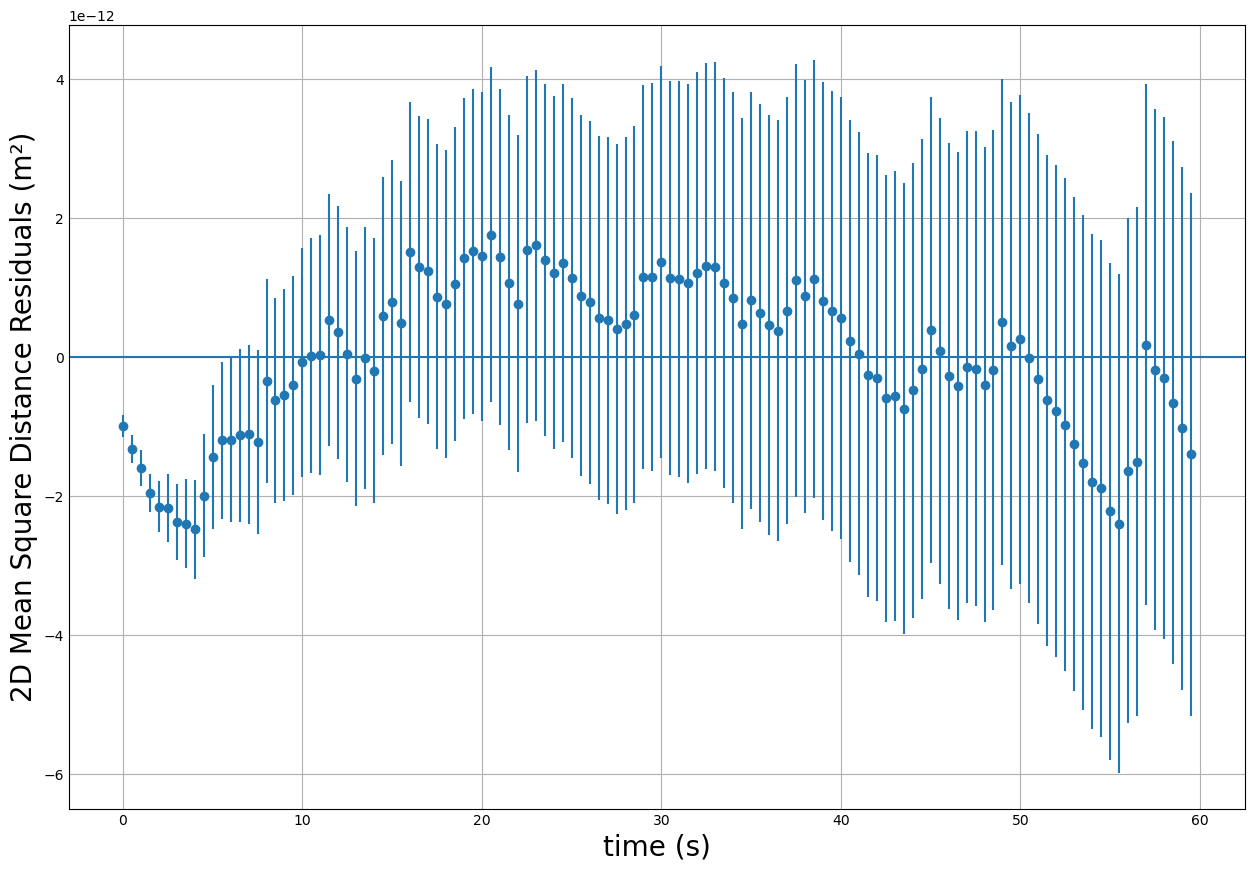

In [9]:
i = 0
for d in df:

    fig, ax = plt.subplots()
    
    # make the data
    x = np.array(d['time'].to_list())
    y = np.array((d['d^2']).to_list())

    # line of best fit
    # - outliers already corrected for 0 and 8
    fit = a[i]*x+b[i]
    ax.axhline(y=0)

    res = y-fit
    
    # plot
    ax.scatter(x, res)
    ax.set_xlabel("time (s)", fontsize=20)
    ax.set_ylabel("2D Mean Square Distance Residuals (m\u00b2)", fontsize=20)
    ax.errorbar(x, res, xerr=x_err, yerr=y_err[i], fmt='none')
    

    fig.set_size_inches(12, 8)
    name = "msdtime_" + str(i) + "_residuals.png"
    fig.savefig(name, bbox_inches='tight', pad_inches=0.5)

    i += 1

print(a)
print(b)

Chi-squared test 

In [10]:
#print(a)
#print(b) 
#print(len(a))

# 14 points each, # of data sets
var = [0] * len(a) 
chi2 = [0] * len(a)
denom = [0] * len(a)
s2 = [0] * len(a) # variance of fit
redchi2 = [0] * len(a)

i = 0
for d in df:

    # data
    x = np.array(d['time'].to_list()) # 120 points each
    y = np.array((d['d^2']).to_list())
    fit = a[i]*x+b[i]
    res = y-fit
    N = len(y)
    m = 2 # linear fit
    
    # calculate variance
    var_i = [0] * len(y) # variance for this pair?
    y_avg = sum(y)/len(y)
    for j in range(0, len(y)):
        var_i[j] = (y[j] - y_avg)**2
        var[i] += (y[j] - y_avg)**2
    var[i] /= len(y)-1

    # calculate chi-squared
    for j in range(0, len(y)):
        chi2[i] += res[j]**2 / var_i[j]

    # calculate denominator
    # - weighted average of individual variances
    for j in range(0, len(y)):
        denom[i] += 1/var_i[j]
    denom[i] /= N

    # calculate variance of fit
    s2[i] = 1/(N-m) * chi2[i]/denom[i]

    # reduced chi-squared
    redchi2[i] = 1/(N-m) * chi2[i]
    
    i += 1

print(chi2)
print(denom)

print()
print(s2)

print()
print(redchi2)

[6.34419062592591, 490.426915584129, 7.600158958144728, 23.276833988473694, 68.70256269342822, 120.65641039680587, 547.4963748206848, 159.5050264888127, 7.528699080907494, 5.914838393042939, 15.772521425764785, 90.07615084258482, 1143.7940339256593, 13.952218827397514]
[1.4631735193334427e+24, 2.608286842211771e+24, 1.079227727508224e+24, 7.33442325568559e+23, 2.5341021297905006e+24, 2.2477241783981468e+24, 3.6847347695094835e+24, 4.451490713639594e+25, 9.585143484154258e+22, 1.1516836786175571e+23, 1.1616136517789016e+23, 1.1637659601280924e+23, 2.7128856119866646e+24, 1.626056013930935e+23]

[3.6745011188316083e-26, 1.593444491724722e-24, 5.967982949497336e-26, 2.689527153128908e-25, 2.2975597578601116e-25, 4.549098872282465e-25, 1.259195051163378e-24, 3.0365951533387777e-26, 6.656398486828848e-25, 4.3523885962987265e-25, 1.15068754234138e-24, 6.559370497882231e-24, 3.573010869386652e-24, 7.271529491731627e-25]

[0.05376432733835517, 4.156160301560416, 0.06440812676393838, 0.19726130

In [11]:
# average and sd of reduced chi-squared
redchi2_avg = sum(redchi2)/len(redchi2)
print("mean reduced chi-squared:", redchi2_avg)
t0 = 0
for i in range(0, len(redchi2)):
    t0 += (redchi2[i] - redchi2_avg)**2
    print((redchi2[i] - redchi2_avg)**2)
t0 /= len(redchi2)-1
print("sd of reduced chi-squared:", t0)

mean reduced chi-squared: 1.6350163051160784
2.5003578172259613
6.356167050807324
2.4668100499066274
2.0671394403959784
1.1083693056275044
0.3751615819548939
9.028723770694624
0.08024687427970377
2.4687127127097503
2.5118780745692906
2.2540544327614147
0.7597895771739598
64.9338374091673
2.300612960714965
sd of reduced chi-squared: 7.63168161984533


The 12th data set is really bad, let's remove that and see if our values improve

In [12]:
# the 12th data set is really bad, let's see how it looks when we remove it
#print(redchi2[12])
t1 = redchi2.copy()
t1.pop(12)
#print(t1)

redchi2_avg = sum(t1)/len(t1)
print("mean reduced chi-squared:", redchi2_avg)
t0 = 0
for i in range(0, len(t1)):
    t0 += (t1[i] - redchi2_avg)**2
    print((t1[i] - redchi2_avg)**2)
t0 /= len(t1)-1
print("sd of reduced chi-squared:", t0)
print(len(t1))

mean reduced chi-squared: 1.0151583455841604
0.9242784583188158
9.865893287446662
0.9039259785867001
0.6689555690174864
0.18743118857619134
5.4075534897761846e-05
13.13802557604517
0.11328553568055835
0.9050778791238456
0.9312879122893432
0.7770297499793553
0.06340381161437222
0.804464056672658
sd of reduced chi-squared: 2.440259423240504
13


Because we see a significant improvement in the reduced chi-squared value after removing the 12th data set, that data set will also be removed when calculating for k.

### Get intended values

In [13]:
# get D and k
print(a)
D = [e/4 for e in a]
print(D)

# k
r = 0.95*10**(-6)
r_unc = r * (0.1/1.9)
mew = 0.941192*10**(-3) # the decrease from increase of temperature
mew_unc = 0.0470596*10**(-3)
gamma = 6*np.pi*(mew)*r
gamma_unc = gamma * ((mew_unc/mew)**2 + (r_unc/r)**2)**0.5
T = 296.5

k = [gamma*d/T for d in D]
print(k)

[5.423745338098619e-13, 5.836100687668759e-13, 5.115564994957338e-13, 5.772960285656097e-13, 7.224381959420677e-13, 5.702586981975686e-13, 6.805879189900916e-13, 6.295305432338269e-13, 8.154004518407544e-13, 7.105324903109097e-13, 6.408346117736446e-13, 8.619413546019267e-13, 5.620129598578103e-13, 7.493071830685383e-13]
[1.3559363345246547e-13, 1.4590251719171898e-13, 1.2788912487393346e-13, 1.4432400714140242e-13, 1.8060954898551692e-13, 1.4256467454939215e-13, 1.701469797475229e-13, 1.5738263580845673e-13, 2.038501129601886e-13, 1.7763312257772742e-13, 1.6020865294341115e-13, 2.1548533865048167e-13, 1.4050323996445257e-13, 1.8732679576713456e-13]
[7.70757139478711e-24, 8.293560982924457e-24, 7.269622735850975e-24, 8.203833474335573e-24, 1.026641854740312e-23, 8.10382744001945e-24, 9.671692988971853e-24, 8.946127269454053e-24, 1.1587485779904827e-23, 1.0097229047459456e-23, 9.106767030156305e-24, 1.2248868843541317e-23, 7.986648972015088e-24, 1.0648248120278104e-23]


In [14]:
# k
k_acc = 1.38*10**(-23) # J/K
t0 = k.copy()
t0.pop(12)
#k_avg = sum(k)/len(k)
k_avg = sum(t0)/len(t0)
print(k_acc)
print(k_avg)

1.3799999999999998e-23
9.396250281160507e-24


### Uncertainties
Calculate `delta`, `syx2` variance of y(x), and `sm` standard deviation of the slope `a` for all data sets. After standard uncertainty propogation, this will get the uncertainty for `D`.
- recall datasets 0 and 8 will be calculated differently since their outliers are removed<br>

Next, calculate the uncertainty for `k` through standard uncertainty propogation. <br>

Then, calculate mean `k` (done above), and standard deviation of the mean for its uncertainty.

In [15]:
# delta the same for any data set (time, x, is the same)
x = df[0]['time'].tolist()
N = len(x)
t1 = 0
t2 = 0
for e in x:
    t1 += e**2
    t2 += e
delta = N*t1 - t2**2
print("delta:", delta)

# redo 0 and 8 separately!
syx2 = [0] * len(a)
sm = [0] * len(a)
j = 0
for d in df:
    # syx2 for each data set
    y = d['d^2'].tolist()
    N = len(y)
    
    t1 = 0
    for i in range(0, len(y)):
        t1 += (y[i] - (b[j] + a[j]*x[i]))**2
    syx2[j] = t1/(N-2)

    # sm
    sm[j] = (N * syx2[j]/delta)**0.5

    j += 1
    
# 0
# syx2
y = df[0]['d^2'][5:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[0] + a[0]*x[i]))**2
syx2[0] = t1/(N-2)
# sm
sm[0] = (N * syx2[0]/delta)**0.5

# 8
# syx2
y = df[8]['d^2'][4:].tolist()
N = len(y)
t1 = 0
for i in range(0, len(y)):
    t1 += (y[i] - (b[8] + a[8]*x[i]))**2
syx2[8] = t1/(N-2)
# sm
sm[8] = (N * syx2[8]/delta)**0.5

print("syx2:", syx2)
print("sm:", sm)

# uncertainty for D
print()
D_unc = [0] * len(a)
for i in range(0, len(a)):
    D_unc[i] = D[i] * sm[i]/a[i]

print("D:", D)
print("D_unc:", D_unc)

delta: 4319700.0
syx2: [2.3150861483406317e-24, 7.555705988940727e-25, 4.554240779501136e-25, 3.5890524731050954e-25, 3.3819356886820913e-25, 3.6797508989297144e-25, 1.1383927322519352e-24, 9.784011205916222e-25, 3.2035367489889383e-24, 8.818347397872245e-25, 6.012838411131919e-25, 3.503084584302935e-24, 1.214464665899226e-24, 1.2173012823883873e-24]
sm: [7.850651613648955e-15, 4.581433159802506e-15, 3.5569013778328125e-15, 3.1575754280467626e-15, 3.0651130854785045e-15, 3.1972238195961723e-15, 5.623541274541784e-15, 5.213415040473798e-15, 9.275067022608983e-15, 4.949455588928138e-15, 4.0869901987057346e-15, 9.864819465263417e-15, 5.80839672270634e-15, 5.81517608186293e-15]

D: [1.3559363345246547e-13, 1.4590251719171898e-13, 1.2788912487393346e-13, 1.4432400714140242e-13, 1.8060954898551692e-13, 1.4256467454939215e-13, 1.701469797475229e-13, 1.5738263580845673e-13, 2.038501129601886e-13, 1.7763312257772742e-13, 1.6020865294341115e-13, 2.1548533865048167e-13, 1.4050323996445257e-13, 1.

In [16]:
# uncertainty for k
k_unc = [0] * len(k)
for i in range(0, len(k)):
    k_unc[i] = k[i] * ((D_unc[i]/D[i])**2 + (gamma_unc/gamma)**2 + (0.5/296.5)**2)**0.5

print("k:", k)
print("k_unc:", k_unc)

k: [7.70757139478711e-24, 8.293560982924457e-24, 7.269622735850975e-24, 8.203833474335573e-24, 1.026641854740312e-23, 8.10382744001945e-24, 9.671692988971853e-24, 8.946127269454053e-24, 1.1587485779904827e-23, 1.0097229047459456e-23, 9.106767030156305e-24, 1.2248868843541317e-23, 7.986648972015088e-24, 1.0648248120278104e-23]
k_unc: [5.706956068100071e-25, 6.0574524533356255e-25, 5.30297547422138e-25, 5.974082748291494e-25, 7.467665853060474e-25, 5.902102164624437e-25, 7.068413227160535e-25, 6.53833327225773e-25, 8.516852746291126e-25, 7.365753684597112e-25, 6.638327649123988e-25, 9.00430356073932e-25, 5.857943682554822e-25, 7.776251559561085e-25]


In [17]:
# mean and standard deviation for k

# standard deviation for each k
sd_k = 0
N = len(k)
t1 = 0
for i in range(0, N):
    t1 += (k[i]-k_avg)**2

sd_k = (t1/(N-1))**0.5
sd_k_avg = sd_k/(N**0.5)
t0 = k_unc.copy()
t0.pop(12)
k_unc_avg = sum(t0)/len(t0)

print("k_avg:", k_avg)
print("sd_k_avg:", sd_k_avg)
print("k_unc_avg:", k_unc_avg)

k_avg: 9.396250281160507e-24
sd_k_avg: 4.045522796391116e-25
k_unc_avg: 6.8707284970280295e-25


gonna use k_unc_avg bc it's larger

In [18]:
print("literal difference:", k_acc-k_avg)
print("error:", (k_acc-k_avg)/k_acc)

literal difference: 4.40374971883949e-24
error: 0.31911229846662975


## Distribution of Steps in a Constant Time Interval
1. Calculate the distance travelled (the step size) between each time point.
2. Repeat for all of your data sets.
3. Compile all the step size data into a single 1D array.

In [19]:
from scipy.optimize import curve_fit

# make dist column
for d in df:
    dist = (d['dx']**2 + d['dy']**2)**0.5
    d.insert(loc=5, column='dist', value=dist)

In [20]:
display(df[4][0:119])

# compile all step size data into a single 1D array
distances = []
for d in df:
    distances.extend(d['dist'][0:119].tolist())

,time,X (pixels),dx,Y (pixels),dy,dist,d^2
0,0.0,444.63,-3.70,283.87,-2.46,4.443152,2.861774e-13
1,0.5,440.93,6.22,281.41,-3.42,7.098225,1.016564e-12
2,1.0,447.15,4.65,277.99,0.81,4.720021,1.339518e-12
3,1.5,451.80,4.19,278.80,-0.48,4.217404,1.597354e-12
4,2.0,455.99,3.22,278.32,-4.89,5.854955,2.094289e-12
...,...,...,...,...,...,...,...
114,57.0,481.57,4.55,258.84,-1.80,4.893107,4.202583e-11
115,57.5,486.12,1.13,257.04,-0.89,1.438402,4.205582e-11
116,58.0,487.25,-6.83,256.15,1.32,6.956386,4.275731e-11
117,58.5,480.42,-4.61,257.47,-0.93,4.702871,4.307792e-11


Don't remove the outliers. Recall that this is a probability density function and there are only 9 outliers of all the points used so it will be a low probability anyways.

In [21]:
# check array was made correctly
print(distances[-1])
display(df[-1].tail())

0.7333484846919871


,time,X (pixels),dx,Y (pixels),dy,dist,d^2
115,57.5,1011.22,0.77,625.22,-0.21,0.798123,4.396898e-11
116,58.0,1011.99,-0.87,625.01,4.14,4.230426,4.422841e-11
117,58.5,1011.12,-0.97,629.15,0.45,1.069299,4.424498e-11
118,59.0,1010.15,0.07,629.60,0.73,0.733348,4.425278e-11
119,59.5,1010.22,0.00,630.33,0.00,0.000000,4.425278e-11


In [22]:
# unit conversion
for i in range(0, len(distances)):
    distances[i] = distances[i] * (0.1204*10**(-6))

In [23]:
# uncertainties for distances
distances_unc = []

i = 0
for d in df:
    # unit conversion
    dx_val = d['dx']*(0.1204*10**(-6))
    dy_val = d['dy']*(0.1204*10**(-6))
    dist_val = d['dist'] * (0.1204*10**(-6))

    d_in_unc = [0] * len(dx_val)
    d_unc = [0] * len(dx_val)

    for j in range(0, len(dx_val)):
        # d_^2 unc
        if dx_val[j] != 0:
            dx2_unc[j] = 2 * dx_val[j]**2 * (dx_new_unc/dx_val[j])
        if dy_val[j] != 0:
            dy2_unc[j] = 2 * dy_val[j]**2 * (dy_new_unc/dy_val[j])
            
        # individual distance unc
        d_in_unc[j] = (dx2_unc[j]**2 + dy2_unc[j]**2)**0.5
        if (dx_val[j]**2 + dy_val[j]**2) != 0:
            d_unc[j] = dist_val[j] * 1/2 * d_in_unc[j]/(dx_val[j]**2 + dy_val[j]**2)

    distances_unc.extend(d_unc)

    i += 1
    
print(sum(distances)/len(distances), "±", sum(distances_unc)/len(distances_unc))
#print(distances)

5.232210922473239e-07 ± 2.8146950534030935e-07


4. Plot the step size data in a histogram with an appropriate number of bins.
5. Fit Equation 18 to the data using the curve_fit() function from SciPy. Refer back to the theoretical discussion; calculate k.
6. Use the maximum likelihood estimate to calculate k.
7. Plot the Rayleigh distribution using each estimate on the same axes as the histogram.

Many thanks to [this stack overflow post](https://stackoverflow.com/questions/65116839/rayleigh-distribution-curve-fit-on-python) which helped resolve issues with the curve fitting.

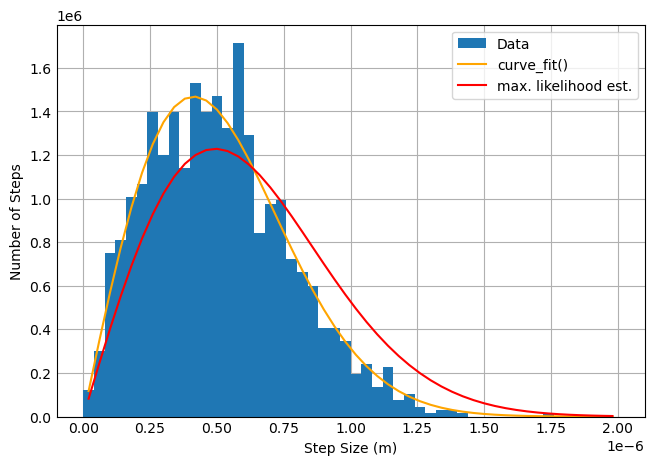

In [27]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 4)
ax.set_xlabel("Step Size (m)")
ax.set_ylabel("Number of Steps")

def f(r, a):
    return (r/(a*a))*np.exp((-1*(r**2))/(2*a*a))

# plot step size data in a histogram
bin_n = 50
hist_values, bin_edges, patches = ax.hist(distances, bins=bin_n, range=(0, 2*10**(-6)), density=True, label='Data')

# fit using curve_fit
# guess based on a from f(r, a) calculated using the accepted value of k
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
x = bin_centers
y = hist_values

popt, pcov = curve_fit(f, x, y, p0 = (4.92e-7,))
ax.plot(x, f(x, *popt), label='curve_fit()', color='orange')

# fit using maximum likelihood estimate
scale_est = 0

N = len(distances)
t1 = 0
for i in range(0, N):
    t1 += distances[i]**2
scale_est = t1/(2*N)

ax.plot(x, f(x, scale_est**0.5), label='max. likelihood est.', color='red')

# save
ax.legend()
fig.savefig("probdist_steplengths.png", bbox_inches='tight', pad_inches=0.5)

8. Calculate the percent difference from the accepted value of k = 1.38 × 10−23J/K.

Will also do the uncertainties for k.

In [358]:
# Uncertainties for D from curve_fit()
perr = np.sqrt(np.diag(pcov))
popt2 = popt[0]**2
popt2_unc = popt2 * 2 * (perr[0]/popt[0])

# 2 and 0.5 cancel out, nice choice of time step
D_fit = popt2/(2*0.5)
D_fit_unc = D_fit*((popt2_unc/popt2)**2 + (0.03/0.5)**2)**0.5
print("D_fit:", D_fit, "±", D_fit_unc)

D_fit: 1.7065256628823396e-13 ± 1.143408969605112e-14


In [359]:
# Uncertainties for D from maximum-likelihood estimate
# - just using provided unc propogation
D_est = scale_est/(2*0.5)

scale_est_unc = 0  # TEMP

dist2_unc = [0] * len(distances)
for i in range(0, len(distances)):
    dist2_unc[i] = distances[i]**2 * 2 * distances_unc[i]/distances[i]
    
dist2_sum_unc = 0
for i in range(0, len(distances)):
    dist2_sum_unc += dist2_unc[i]**2
dist2_sum_unc = dist2_sum_unc**0.5

scale_est_unc = scale_est * (dist2_sum_unc/t1)

# unc from ML and MOM Estimates of Rayleigh Distribution Parameter cited below
#adjusted for a sample
#scale_est_unc = 0.5 * (scale_est**0.5)/((N-1)**0.5)
D_est_unc = D_est*((scale_est_unc/scale_est)**2 + (0.03/0.5)**2)**0.5
print("D_est:", D_est, "±", D_est_unc)

D_est: 2.4371303637600015e-13 ± 1.5419249144473976e-14


In [360]:
# k and uncertainties for k
k_fit = gamma*D_fit/T
k_est = gamma*D_est/T

k_fit_unc = k_fit * ((D_fit_unc/D_fit)**2 + (gamma_unc/gamma)**2 + (0.5/296.5)**2)**0.5
k_est_unc = k_est * ((D_est_unc/D_est)**2 + (gamma_unc/gamma)**2 + (0.5/296.5)**2)**0.5

print("k_fit:", k_fit, "±", k_fit_unc)
print("k_est:", k_est, "±", k_est_unc)

k_fit: 9.70043212855793e-24 ± 9.584407697385235e-25
k_est: 1.3853420546967533e-23 ± 1.3342342385044063e-24


In [361]:
# percent difference 
print("error, k_fit:", (k_acc-k_fit)/k_acc)
print("error, k_est:", (k_est-k_acc)/k_acc)

error, k_fit: 0.2970701356117441
error, k_est: 0.003871054128082253


## References
Formulas, Certain Values
- Thermal Motion Lab Manual

Second Part Curve Fitting
- https://stackoverflow.com/questions/65116839/rayleigh-distribution-curve-fit-on-python

Error Analysis
- Error Analysis for 2nd Year Experimental Physics
- Uncertainties in Linear fit
- Uncertainty Propogation Formulae
- Variance (and thus sd) for the Rayleigh Distribution Maximum Likelihood Estimate https://ocw.mit.edu/ans7870/18/18.443/s15/projects/Rproject3_rmd_rayleigh_theory.html